<a href="https://colab.research.google.com/github/nabilakartika/Fish-Freshness/blob/main/PR_day10_Nabilah_Kartika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Projects Portofolio
### Ketentuan Tugas :
1. Dibebaskan untuk men-download Dataset dari Kaggle atau sumber data lainnya, pilih untuk kasus supervised atau unsupervised.
2. Buatlah End to end project Machine Learning di local jupyter notebook / Google Collaboratory.
3. Ganti nama file : template_pr_day10.ipynb  dengan PR_day10_nama_siswa.ipynb
4. Upload Dataset yang digunakan ke Kaggle
5. Upload file code dan ppt (jika ada) ke dalam github repository + file readme pada github.
6. Tugas ini bersifat individu, dikumpulkan ke LMS dalam bentuk **link githubnya saja**.

## Data Pre-Processing


In [1]:
# Import Library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import skimage
import os
import cv2
import tensorflow as tf
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras import layers, models, optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/Gurame'
class_names = np.array(tf.io.gfile.listdir(str(dataset)))
print(class_names)

['INSANG' 'SURFACE']


In [ ]:
fn_ikan = tf.io.gfile.glob(dataset + '/*/*/*.jpg')
filenames = fn_ikan
num_samples = len(filenames)
print('Number of total examples:', num_samples)

Number of total examples: 3627


In [ ]:
df = pd.DataFrame(filenames, columns=['filename'])
df

filename
0     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...
1     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...
2     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...
3     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...
4     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...
...                                                 ...
3622  /content/drive/MyDrive/Gurame/INSANG/28/WIN_20...
3623  /content/drive/MyDrive/Gurame/INSANG/28/WIN_20...
3624  /content/drive/MyDrive/Gurame/INSANG/28/WIN_20...
3625  /content/drive/MyDrive/Gurame/INSANG/28/WIN_20...
3626  /content/drive/MyDrive/Gurame/INSANG/28/WIN_20...

[3627 rows x 1 columns]

In [ ]:
def get_label(fn):
  parts = fn.split('/')
  label = parts[4]
  hour = parts[6]
  return label,hour

In [ ]:
df['Jenis_Ikan'] = 'a'
df['Waktu'] = 0
for i in range(len(df)):
  path = df.filename.values[i]
  label,hour = get_label(path)
  df['Jenis_Ikan'].values[i] = label
  df['Waktu'].values[i] = int(hour)

df

filename Jenis_Ikan  Waktu
0     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0
1     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0
2     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0
3     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0
4     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0
...                                                 ...        ...    ...
3622  /content/drive/MyDrive/Gurame/INSANG/28/WIN_20...     Gurame     28
3623  /content/drive/MyDrive/Gurame/INSANG/28/WIN_20...     Gurame     28
3624  /content/drive/MyDrive/Gurame/INSANG/28/WIN_20...     Gurame     28
3625  /content/drive/MyDrive/Gurame/INSANG/28/WIN_20...     Gurame     28
3626  /content/drive/MyDrive/Gurame/INSANG/28/WIN_20...     Gurame     28

[3627 rows x 3 columns]

In [ ]:
df.Jenis_Ikan.value_counts()

Gurame    3627
Name: Jenis_Ikan, dtype: int64

In [ ]:
df.Waktu.value_counts()

17    120
32    108
0     100
3     100
23    100
31    100
33    100
34    100
29    100
35    100
30    100
2     100
4     100
5     100
8     100
9     100
7     100
28    100
19    100
15    100
11    100
12    100
14    100
1     100
18    100
13    100
16    100
25    100
22    100
10    100
26    100
21    100
24    100
20    100
6     100
27     99
Name: Waktu, dtype: int64

## Segmentation

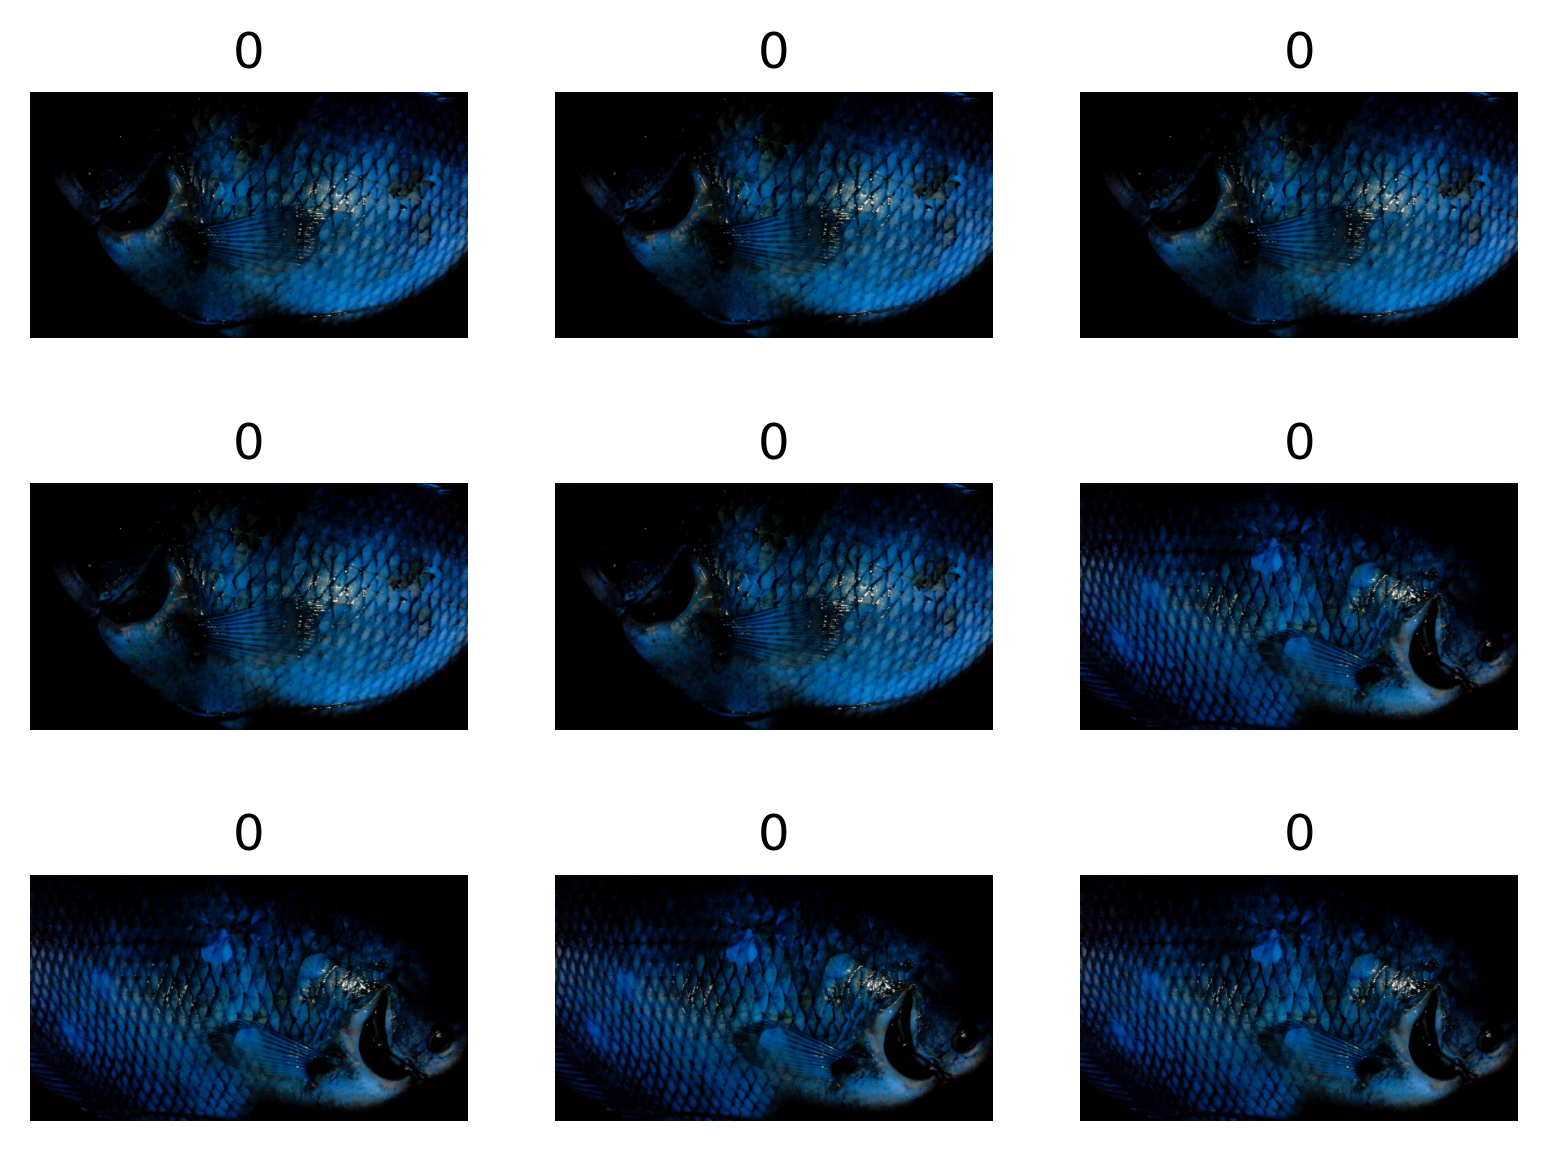

In [ ]:
#plt.figure(figsize=(7,7)) #7=panjang,5=lebar
for i in range(9): #9 = jumlah gambar yang diambil
  image_path = df.filename.values[i]
  img = plt.imread(image_path)
  ax = plt.subplot(3, 3, i + 1) #3,3 ada 3 gambar horizontal dan vertikal. i (subplot) adalah 0-8, maka dari itu dijumlah 1
  plt.imshow(img)
  label = df.Waktu.values[i]
  plt.title(label)
  plt.axis("off")

In [ ]:
def segmentation(path):
    img = plt.imread(path)
    segmented = img[250:800, 700:2000]
    return segmented

In [ ]:
def segment_insang(path):
    img = plt.imread(path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.blur(hsv, (11,11), 0)
    ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    ret, thresh2 = cv2.threshold(hsv, 50, 255, cv2.THRESH_BINARY)
    kernel = np.ones((9,9),np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    return opening

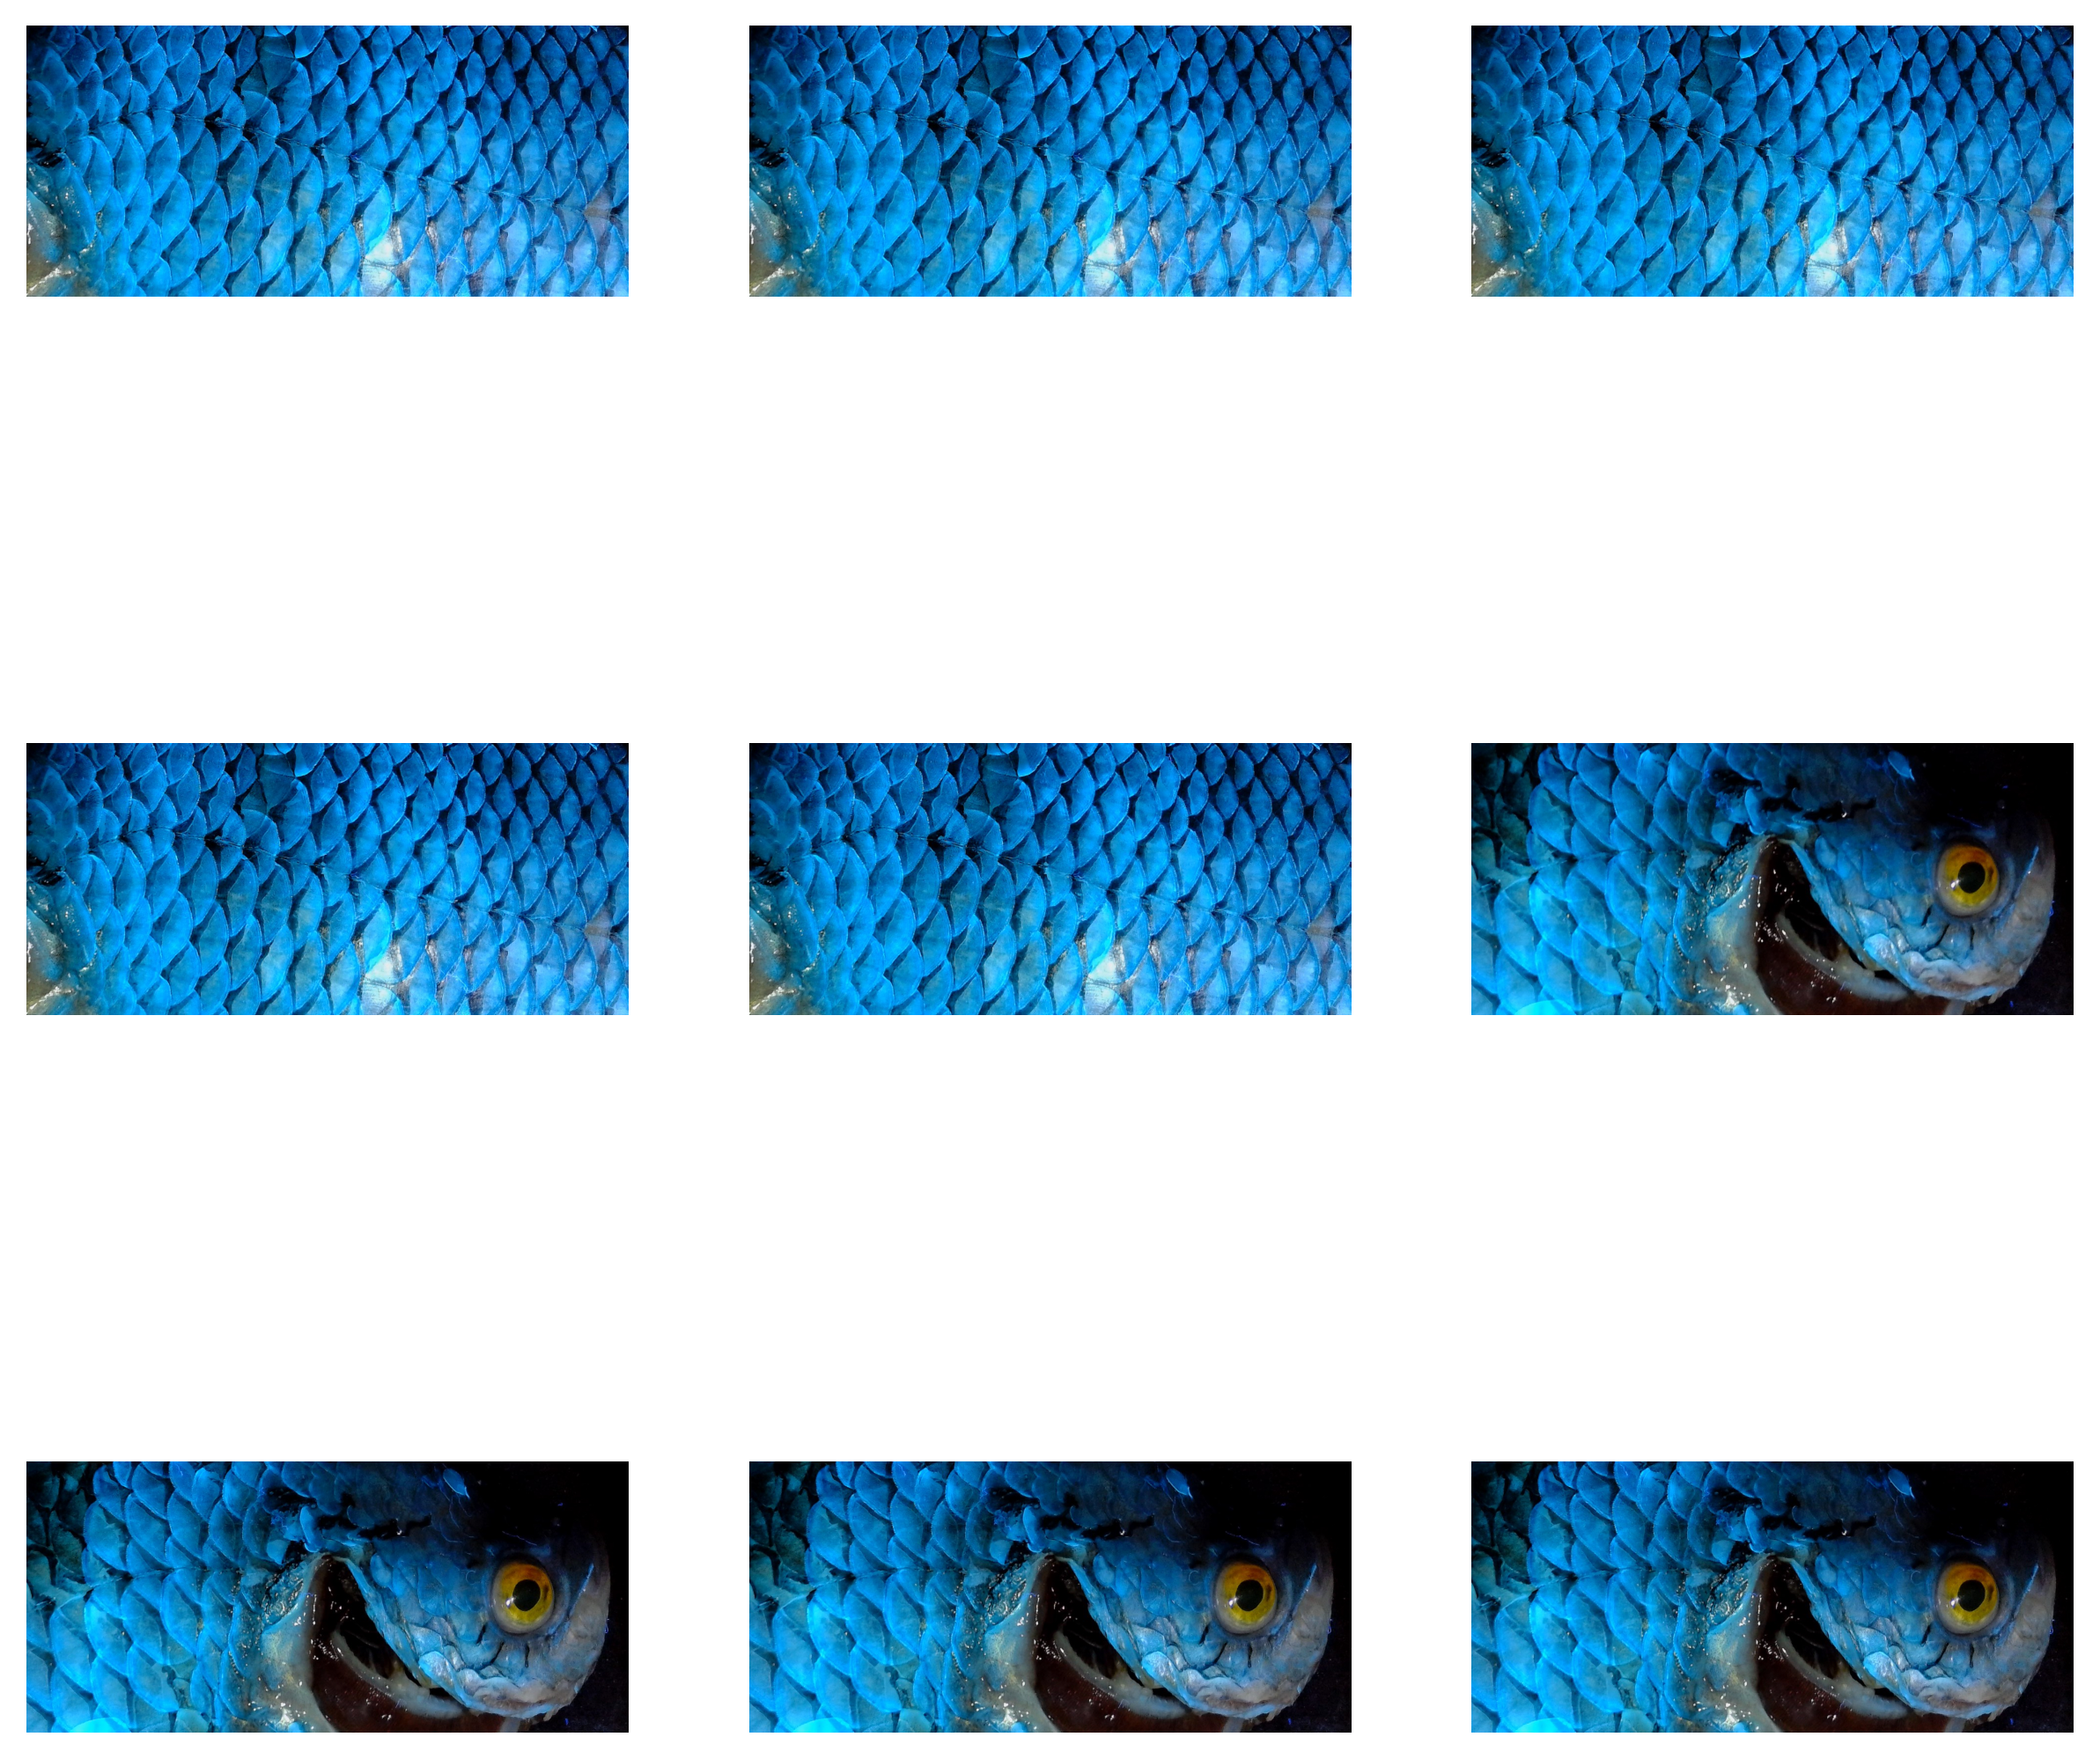

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  image_path = df.filename.values[i+65]
  masked = segmentation(image_path)
  ax = plt.subplot(3,3, i + 1)
  plt.imshow(masked)
  plt.axis("off")

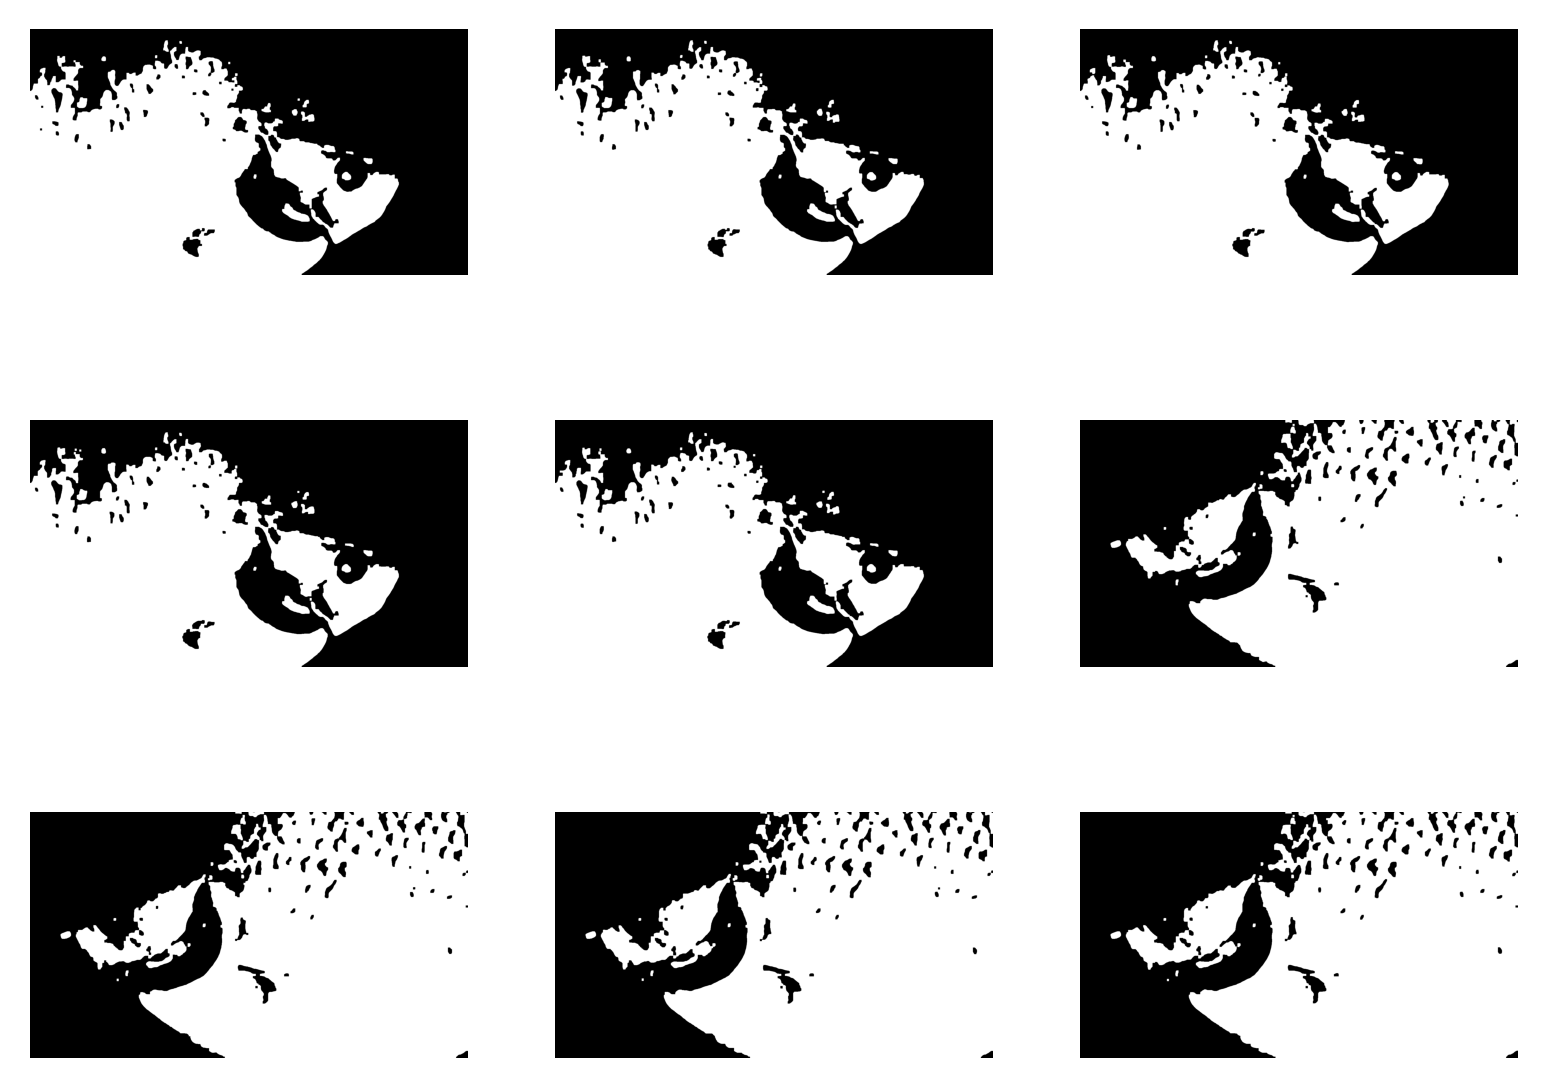

In [ ]:
#plt.figure(figsize=(10,10))
for i in range(9):
  image_path = df.filename.values[i]
  mask = segment_insang(image_path)
  #img = np.hstack((mask,thresh2))
  plt.subplot(3,3, i + 1)
  plt.imshow(mask, cmap='gray')
  plt.axis("off")

## Feature Extraction

In [ ]:
def get_RGB(image):
  #image = plt.imread(path)
  R = image[:,:,0]
  G = image[:,:,1]
  B = image[:,:,2]
  return R, G, B

In [ ]:
def get_CIELab(image):
    #image = plt.imread(path)
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    L = lab[:, :, 0]
    a = lab[:, :, 1]
    b = lab[:, :, 2]
    return L, a, b

In [ ]:
def get_HSV(image):
    #image = plt.imread(path)
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h = lab[:, :, 0]
    s = lab[:, :, 1]
    v = lab[:, :, 2]
    return h, s, v

In [ ]:
def get_mean_stdDev(arr):
    mean, std = cv2.meanStdDev(arr)
    return mean, std

In [ ]:
import scipy

def get_skewness(arr):
    sk = scipy.stats.skew(arr, axis = None)
    return sk

In [ ]:
def get_kurtosis(arr):
    ku = scipy.stats.kurtosis(arr, axis = None)
    return ku

In [ ]:

df['r_mean'] = 0.0
df['g_mean'] = 0.0
df['b_mean'] = 0.0
df['r_std'] = 0.0
df['g_std'] = 0.0
df['b_std'] = 0.0
for i in range(len(df)):
  image_path = df.filename.values[i]
  masked = segmentation(image_path)
  r, g, b = get_RGB(masked)
  mean_r, std_r = get_mean_stdDev(r)
  mean_g, std_g = get_mean_stdDev(g)
  mean_b, std_b = get_mean_stdDev(b)
  df['r_mean'].values[i] = mean_r[0][0]
  df['g_mean'].values[i] = mean_g[0][0]
  df['b_mean'].values[i] = mean_b[0][0]
  df['r_std'].values[i] = std_r[0][0]
  df['g_std'].values[i] = std_g[0][0]
  df['b_std'].values[i] = std_b[0][0]

df


filename Jenis_Ikan  Waktu  \
0     /content/drive/MyDrive/Gurame/INSANG/10/WIN_20...     Gurame     10   
1     /content/drive/MyDrive/Gurame/INSANG/10/WIN_20...     Gurame     10   
2     /content/drive/MyDrive/Gurame/INSANG/10/WIN_20...     Gurame     10   
3     /content/drive/MyDrive/Gurame/INSANG/10/WIN_20...     Gurame     10   
4     /content/drive/MyDrive/Gurame/INSANG/10/WIN_20...     Gurame     10   
...                                                 ...        ...    ...   
3622  /content/drive/MyDrive/Gurame/SURFACE/24/WIN_2...     Gurame     24   
3623  /content/drive/MyDrive/Gurame/SURFACE/24/WIN_2...     Gurame     24   
3624  /content/drive/MyDrive/Gurame/SURFACE/24/WIN_2...     Gurame     24   
3625  /content/drive/MyDrive/Gurame/SURFACE/24/WIN_2...     Gurame     24   
3626  /content/drive/MyDrive/Gurame/SURFACE/24/WIN_2...     Gurame     24   

         r_mean      g_mean      b_mean      r_std      g_std      b_std  
0     32.314744   61.932089   82.770417  39.254110  58.432941  70.314115  
1     32.268215   61.929568   82.840675  39.197774  58.419899  70.364500  
2     32.180264   61.912750   82.880689  39.199425  58.427713  70.405151  
3     32.202459   61.855803   82.738580  39.085610  58.384761  70.385894  
4     32.242563   61.887082   82.784674  39.150314  58.407254  70.349804  
...         ...         ...         ...        ...        ...        ...  
3622  11.998933  111.894556  166.882714  16.745664  47.189887  69.008382  
3623  12.808085  112.012151  166.308882  17.284351  47.196348  68.861448  
3624  13.385143  112.088265  165.905200  17.733495  47.237046  68.823393  
3625  12.988878  112.041329  166.090920  17.457895  47.187434  68.856589  
3626  13.302696  112.152885  165.946788  17.573847  47.252627  68.811108  

[3627 rows x 9 columns]

In [ ]:
df['r_sk'] = 0.0
df['g_sk'] = 0.0
df['b_sk'] = 0.0
df['r_ku'] = 0.0
df['g_ku'] = 0.0
df['b_ku'] = 0.0

for i in range(len(df)):
    image_path = df.filename.values[i]
    masked = segmentation(image_path)
    r, g, b = get_RGB(masked)
    sk_r = get_skewness(r)
    sk_g = get_skewness(g)
    sk_b = get_skewness(b)
    ku_r = get_kurtosis(r)
    ku_g = get_kurtosis(g)
    ku_b = get_kurtosis(b)
    df['r_sk'].values[i] = sk_r
    df['g_sk'].values[i] = sk_g
    df['b_sk'].values[i] = sk_b
    df['r_ku'].values[i] = ku_r
    df['g_ku'].values[i] = ku_g
    df['b_ku'].values[i] = ku_b

df

filename Jenis_Ikan  Waktu  \
0     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0   
1     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0   
2     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0   
3     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0   
4     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0   
...                                                 ...        ...    ...   
3622  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...     Gurame     22   
3623  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...     Gurame     22   
3624  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...     Gurame     22   
3625  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...     Gurame     22   
3626  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...     Gurame     22   

         r_mean     g_mean     b_mean      r_std      g_std      b_std  \
0     12.688463  52.797656  84.980960  21.835684  33.303251  46.259581   
1     12.710492  53.043152  85.322934  21.857903  33.365600  46.380895   
2     12.474443  52.598021  84.938961  21.852359  33.278269  46.307690   
3     12.589401  52.967191  85.341356  21.840003  33.373694  46.374993   
4     12.593951  53.033367  85.444456  21.863773  33.384001  46.356473   
...         ...        ...        ...        ...        ...        ...   
3622  17.755462  53.495387  72.147763  28.066865  56.254826  76.125505   
3623  17.779990  53.358471  72.068259  28.063733  56.145769  76.096083   
3624  17.867484  53.617232  72.245013  28.186398  56.351080  76.212301   
3625  18.050754  53.773385  72.367563  28.305726  56.441862  76.303024   
3626  18.064258  53.937742  72.554001  28.388829  56.557507  76.417486   

          r_sk  ...     V_mean      H_std      S_std      V_std       H_sk  \
0     3.782726  ...  85.015520  12.335983  52.218920  46.243201   9.765476   
1     3.781237  ...  85.355335  11.419885  52.601275  46.366517  10.270215   
2     3.809939  ...  84.969255  11.826592  52.152900  46.293236  10.073021   
3     3.788197  ...  85.375930  11.646674  51.880356  46.360036  10.278611   
4     3.780562  ...  85.473900  11.271387  51.776385  46.346747  10.495772   
...        ...  ...        ...        ...        ...        ...        ...   
3622  2.267248  ...  74.805660  58.347890  91.750405  75.288417   1.146675   
3623  2.264354  ...  74.704465  58.608514  91.850803  75.263280   1.134293   
3624  2.253226  ...  74.890453  58.385372  91.774292  75.376665   1.160203   
3625  2.230954  ...  75.052314  58.172746  91.694461  75.448286   1.149821   
3626  2.225297  ...  75.221158  58.382472  91.740671  75.565671   1.154141   

          S_sk      V_sk        H_ku      S_ku      V_ku  
0    -2.081730  0.147116  114.870899  4.516180 -0.750598  
1    -2.088535  0.140133  132.332913  4.542748 -0.753178  
2    -2.111505  0.146545  123.835083  4.651953 -0.752283  
3    -2.074494  0.142859  130.208015  4.500720 -0.754917  
4    -2.104139  0.134954  136.493280  4.664802 -0.765878  
...        ...       ...         ...       ...       ...  
3622 -0.729568  0.704641   -0.261618 -0.919329 -0.744114  
3623 -0.718117  0.706504   -0.296669 -0.936546 -0.742952  
3624 -0.727699  0.704399   -0.227381 -0.922421 -0.744481  
3625 -0.721027  0.703276   -0.248480 -0.930243 -0.746808  
3626 -0.721898  0.700023   -0.238730 -0.928857 -0.751950  

[3627 rows x 39 columns]

In [ ]:
df['CIE_L_mean'] = 0.0
df['CIE_a_mean'] = 0.0
df['CIE_b_mean'] = 0.0
df['CIE_L_std'] = 0.0
df['CIE_a_std'] = 0.0
df['CIE_b_std'] = 0.0

for i in range(len(df)):
    image_path = df.filename.values[i]
    masked = segmentation(image_path)
    L, a, b = get_CIELab(masked)
    mean_L, std_L = get_mean_stdDev(L)
    mean_a, std_a = get_mean_stdDev(a)
    mean_CIE_b, std_CIE_b = get_mean_stdDev(b)

    df['CIE_L_mean'].values[i] = mean_L[0][0]
    df['CIE_a_mean'].values[i] = mean_a[0][0]
    df['CIE_b_mean'].values[i] = mean_CIE_b[0][0]
    df['CIE_L_std'].values[i] = std_L[0][0]
    df['CIE_a_std'].values[i] = std_a[0][0]
    df['CIE_b_std'].values[i] = std_CIE_b[0][0]

df

filename Jenis_Ikan     Waktu  \
0     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
1     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
2     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
3     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
4     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
...                                                 ...        ...       ...   
3622  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   
3623  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   
3624  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   
3625  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   
3626  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   

         r_mean     g_mean     b_mean      r_std      g_std      b_std  \
0     12.688463  52.797656  84.980960  21.835684  33.303251  46.259581   
1     12.710492  53.043152  85.322934  21.857903  33.365600  46.380895   
2     12.474443  52.598021  84.938961  21.852359  33.278269  46.307690   
3     12.589401  52.967191  85.341356  21.840003  33.373694  46.374993   
4     12.593951  53.033367  85.444456  21.863773  33.384001  46.356473   
...         ...        ...        ...        ...        ...        ...   
3622  17.755462  53.495387  72.147763  28.066865  56.254826  76.125505   
3623  17.779990  53.358471  72.068259  28.063733  56.145769  76.096083   
3624  17.867484  53.617232  72.245013  28.186398  56.351080  76.212301   
3625  18.050754  53.773385  72.367563  28.305726  56.441862  76.303024   
3626  18.064258  53.937742  72.554001  28.388829  56.557507  76.417486   

          r_sk  ...      b_sk       r_ku      g_ku      b_ku  CIE_L_mean  \
0     3.782726  ...  0.143888  22.206893  0.878487 -0.754087   63.520572   
1     3.781237  ...  0.137015  22.288062  0.865715 -0.756319   63.818151   
2     3.809939  ...  0.143875  22.336027  0.872827 -0.755040   63.369131   
3     3.788197  ...  0.139982  22.196102  0.871778 -0.758152   63.768052   
4     3.780562  ...  0.132242  22.107718  0.853102 -0.769675   63.851310   
...        ...  ...       ...        ...       ...       ...         ...   
3622  2.267248  ...  0.748514   6.405394 -0.861495 -0.717516   60.145653   
3623  2.264354  ...  0.749934   6.392679 -0.860153 -0.716467   60.024645   
3624  2.253226  ...  0.747680   6.324100 -0.867249 -0.718440   60.263642   
3625  2.230954  ...  0.747022   6.169133 -0.868812 -0.720688   60.412410   
3626  2.225297  ...  0.743355   6.104581 -0.875983 -0.726725   60.588173   

      CIE_a_mean  CIE_b_mean  CIE_L_std  CIE_a_std  CIE_b_std  
0     138.535748  155.024845  39.447269   7.363815  15.300965  
1     138.552197  155.156098  39.513337   7.403017  15.311301  
2     138.625167  155.040590  39.446010   7.428623  15.354119  
3     138.604562  155.175666  39.518343   7.411179  15.355079  
4     138.611431  155.210474  39.523085   7.409980  15.343684  
...          ...         ...        ...        ...        ...  
3622  132.617116  147.941182  63.354222   8.013945  26.155948  
3623  132.660171  147.880083  63.277261   8.024569  26.135999  
3624  132.592604  147.943851  63.444534   7.996458  26.154596  
3625  132.584727  147.920855  63.533164   7.998541  26.178155  
3626  132.571095  147.989352  63.641152   7.995781  26.190575  

[3627 rows x 21 columns]

In [ ]:
df['CIE_L_sk'] = 0.0
df['CIE_a_sk'] = 0.0
df['CIE_b_sk'] = 0.0
df['CIE_L_ku'] = 0.0
df['CIE_a_ku'] = 0.0
df['CIE_b_ku'] = 0.0

for i in range(len(df)):
    image_path = df.filename.values[i]
    masked = segmentation(image_path)
    L, a, b = get_CIELab(masked)
    sk_CIE_L = get_skewness(L)
    sk_CIE_a = get_skewness(a)
    sk_CIE_b = get_skewness(b)
    ku_CIE_L = get_kurtosis(L)
    ku_CIE_a = get_kurtosis(a)
    ku_CIE_b = get_kurtosis(b)

    df['CIE_L_sk'].values[i] = sk_CIE_L
    df['CIE_a_sk'].values[i] = sk_CIE_a
    df['CIE_b_sk'].values[i] = sk_CIE_b
    df['CIE_L_ku'].values[i] = ku_CIE_L
    df['CIE_a_ku'].values[i] = ku_CIE_a
    df['CIE_b_ku'].values[i] = ku_CIE_b

df

filename Jenis_Ikan  Waktu  \
0     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0   
1     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0   
2     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0   
3     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0   
4     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0   
...                                                 ...        ...    ...   
3622  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...     Gurame     22   
3623  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...     Gurame     22   
3624  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...     Gurame     22   
3625  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...     Gurame     22   
3626  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...     Gurame     22   

         r_mean     g_mean     b_mean      r_std      g_std      b_std  \
0     12.688463  52.797656  84.980960  21.835684  33.303251  46.259581   
1     12.710492  53.043152  85.322934  21.857903  33.365600  46.380895   
2     12.474443  52.598021  84.938961  21.852359  33.278269  46.307690   
3     12.589401  52.967191  85.341356  21.840003  33.373694  46.374993   
4     12.593951  53.033367  85.444456  21.863773  33.384001  46.356473   
...         ...        ...        ...        ...        ...        ...   
3622  17.755462  53.495387  72.147763  28.066865  56.254826  76.125505   
3623  17.779990  53.358471  72.068259  28.063733  56.145769  76.096083   
3624  17.867484  53.617232  72.245013  28.186398  56.351080  76.212301   
3625  18.050754  53.773385  72.367563  28.305726  56.441862  76.303024   
3626  18.064258  53.937742  72.554001  28.388829  56.557507  76.417486   

          r_sk  ...     V_mean      H_std      S_std      V_std       H_sk  \
0     3.782726  ...  85.015520  12.335983  52.218920  46.243201   9.765476   
1     3.781237  ...  85.355335  11.419885  52.601275  46.366517  10.270215   
2     3.809939  ...  84.969255  11.826592  52.152900  46.293236  10.073021   
3     3.788197  ...  85.375930  11.646674  51.880356  46.360036  10.278611   
4     3.780562  ...  85.473900  11.271387  51.776385  46.346747  10.495772   
...        ...  ...        ...        ...        ...        ...        ...   
3622  2.267248  ...  74.805660  58.347890  91.750405  75.288417   1.146675   
3623  2.264354  ...  74.704465  58.608514  91.850803  75.263280   1.134293   
3624  2.253226  ...  74.890453  58.385372  91.774292  75.376665   1.160203   
3625  2.230954  ...  75.052314  58.172746  91.694461  75.448286   1.149821   
3626  2.225297  ...  75.221158  58.382472  91.740671  75.565671   1.154141   

          S_sk      V_sk        H_ku      S_ku      V_ku  
0    -2.081730  0.147116  114.870899  4.516180 -0.750598  
1    -2.088535  0.140133  132.332913  4.542748 -0.753178  
2    -2.111505  0.146545  123.835083  4.651953 -0.752283  
3    -2.074494  0.142859  130.208015  4.500720 -0.754917  
4    -2.104139  0.134954  136.493280  4.664802 -0.765878  
...        ...       ...         ...       ...       ...  
3622 -0.729568  0.704641   -0.261618 -0.919329 -0.744114  
3623 -0.718117  0.706504   -0.296669 -0.936546 -0.742952  
3624 -0.727699  0.704399   -0.227381 -0.922421 -0.744481  
3625 -0.721027  0.703276   -0.248480 -0.930243 -0.746808  
3626 -0.721898  0.700023   -0.238730 -0.928857 -0.751950  

[3627 rows x 39 columns]

In [ ]:
df['H_mean'] = 0.0
df['S_mean'] = 0.0
df['V_mean'] = 0.0
df['H_std'] = 0.0
df['S_std'] = 0.0
df['V_std'] = 0.0

for i in range(len(df)):
    image_path = df.filename.values[i]
    masked = segmentation(image_path)
    h, s, v = get_HSV(masked)
    mean_h, std_h = get_mean_stdDev(h)
    mean_s, std_s = get_mean_stdDev(s)
    mean_v, std_v = get_mean_stdDev(v)

    df['H_mean'].values[i] = mean_h[0][0]
    df['S_mean'].values[i] = mean_s[0][0]
    df['V_mean'].values[i] = mean_v[0][0]
    df['H_std'].values[i] = std_h[0][0]
    df['S_std'].values[i] = std_s[0][0]
    df['V_std'].values[i] = std_v[0][0]

df

filename Jenis_Ikan     Waktu  \
0     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
1     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
2     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
3     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
4     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
...                                                 ...        ...       ...   
3622  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   
3623  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   
3624  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   
3625  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   
3626  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   

         r_mean     g_mean     b_mean      r_std      g_std      b_std  \
0     12.688463  52.797656  84.980960  21.835684  33.303251  46.259581   
1     12.710492  53.043152  85.322934  21.857903  33.365600  46.380895   
2     12.474443  52.598021  84.938961  21.852359  33.278269  46.307690   
3     12.589401  52.967191  85.341356  21.840003  33.373694  46.374993   
4     12.593951  53.033367  85.444456  21.863773  33.384001  46.356473   
...         ...        ...        ...        ...        ...        ...   
3622  17.755462  53.495387  72.147763  28.066865  56.254826  76.125505   
3623  17.779990  53.358471  72.068259  28.063733  56.145769  76.096083   
3624  17.867484  53.617232  72.245013  28.186398  56.351080  76.212301   
3625  18.050754  53.773385  72.367563  28.305726  56.441862  76.303024   
3626  18.064258  53.937742  72.554001  28.388829  56.557507  76.417486   

          r_sk  ...  CIE_b_sk  CIE_L_ku  CIE_a_ku  CIE_b_ku     H_mean  \
0     3.782726  ... -0.090096 -0.348919 -0.853511 -1.102722  17.291642   
1     3.781237  ... -0.102052 -0.353722 -0.854557 -1.100863  17.155714   
2     3.809939  ... -0.089135 -0.354241 -0.838874 -1.103581  17.140061   
3     3.788197  ... -0.091171 -0.353430 -0.843968 -1.103530  17.148692   
4     3.780562  ... -0.098637 -0.361148 -0.857358 -1.116955  17.088838   
...        ...  ...       ...       ...       ...       ...        ...   
3622  2.267248  ...  0.765769 -1.019948  0.690437 -0.801687  49.583140   
3623  2.264354  ...  0.767731 -1.018454  0.705454 -0.799618  49.909371   
3624  2.253226  ...  0.767152 -1.023431  0.705551 -0.791906  49.420753   
3625  2.230954  ...  0.767823 -1.026076  0.719559 -0.792562  49.491692   
3626  2.225297  ...  0.768964 -1.031487  0.715138 -0.791340  49.598435   

          S_mean     V_mean      H_std      S_std      V_std  
0     217.388751  85.015520  12.335983  52.218920  46.243201  
1     217.255450  85.355335  11.419885  52.601275  46.366517  
2     217.982705  84.969255  11.826592  52.152900  46.293236  
3     217.760924  85.375930  11.646674  51.880356  46.360036  
4     218.013122  85.473900  11.271387  51.776385  46.346747  
...          ...        ...        ...        ...        ...  
3622  168.047887  74.805660  58.347890  91.750405  75.288417  
3623  167.487669  74.704465  58.608514  91.850803  75.263280  
3624  167.930420  74.890453  58.385372  91.774292  75.376665  
3625  167.632896  75.052314  58.172746  91.694461  75.448286  
3626  167.664838  75.221158  58.382472  91.740671  75.565671  

[3627 rows x 33 columns]

In [ ]:
df['H_sk'] = 0.0
df['S_sk'] = 0.0
df['V_sk'] = 0.0
df['H_ku'] = 0.0
df['S_ku'] = 0.0
df['V_ku'] = 0.0

for i in range(len(df)):
    image_path = df.filename.values[i]
    masked = segmentation(image_path)
    h, s, v = get_HSV(masked)
    sk_h = get_skewness(h)
    sk_s = get_skewness(s)
    sk_v = get_skewness(v)
    ku_h = get_kurtosis(h)
    ku_s = get_kurtosis(s)
    ku_v = get_kurtosis(v)

    df['H_sk'].values[i] = sk_h
    df['S_sk'].values[i] = sk_s
    df['V_sk'].values[i] = sk_v
    df['H_ku'].values[i] = ku_h
    df['S_ku'].values[i] = ku_s
    df['V_ku'].values[i] = ku_v

df

filename Jenis_Ikan     Waktu  \
0     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
1     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
2     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
3     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
4     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...      drive  20230204   
...                                                 ...        ...       ...   
3622  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   
3623  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   
3624  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   
3625  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   
3626  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...      drive  20230205   

         r_mean     g_mean     b_mean      r_std      g_std      b_std  \
0     12.688463  52.797656  84.980960  21.835684  33.303251  46.259581   
1     12.710492  53.043152  85.322934  21.857903  33.365600  46.380895   
2     12.474443  52.598021  84.938961  21.852359  33.278269  46.307690   
3     12.589401  52.967191  85.341356  21.840003  33.373694  46.374993   
4     12.593951  53.033367  85.444456  21.863773  33.384001  46.356473   
...         ...        ...        ...        ...        ...        ...   
3622  17.755462  53.495387  72.147763  28.066865  56.254826  76.125505   
3623  17.779990  53.358471  72.068259  28.063733  56.145769  76.096083   
3624  17.867484  53.617232  72.245013  28.186398  56.351080  76.212301   
3625  18.050754  53.773385  72.367563  28.305726  56.441862  76.303024   
3626  18.064258  53.937742  72.554001  28.388829  56.557507  76.417486   

          r_sk  ...     V_mean      H_std      S_std      V_std       H_sk  \
0     3.782726  ...  85.015520  12.335983  52.218920  46.243201   9.765476   
1     3.781237  ...  85.355335  11.419885  52.601275  46.366517  10.270215   
2     3.809939  ...  84.969255  11.826592  52.152900  46.293236  10.073021   
3     3.788197  ...  85.375930  11.646674  51.880356  46.360036  10.278611   
4     3.780562  ...  85.473900  11.271387  51.776385  46.346747  10.495772   
...        ...  ...        ...        ...        ...        ...        ...   
3622  2.267248  ...  74.805660  58.347890  91.750405  75.288417   1.146675   
3623  2.264354  ...  74.704465  58.608514  91.850803  75.263280   1.134293   
3624  2.253226  ...  74.890453  58.385372  91.774292  75.376665   1.160203   
3625  2.230954  ...  75.052314  58.172746  91.694461  75.448286   1.149821   
3626  2.225297  ...  75.221158  58.382472  91.740671  75.565671   1.154141   

          S_sk      V_sk        H_ku      S_ku      V_ku  
0    -2.081730  0.147116  114.870899  4.516180 -0.750598  
1    -2.088535  0.140133  132.332913  4.542748 -0.753178  
2    -2.111505  0.146545  123.835083  4.651953 -0.752283  
3    -2.074494  0.142859  130.208015  4.500720 -0.754917  
4    -2.104139  0.134954  136.493280  4.664802 -0.765878  
...        ...       ...         ...       ...       ...  
3622 -0.729568  0.704641   -0.261618 -0.919329 -0.744114  
3623 -0.718117  0.706504   -0.296669 -0.936546 -0.742952  
3624 -0.727699  0.704399   -0.227381 -0.922421 -0.744481  
3625 -0.721027  0.703276   -0.248480 -0.930243 -0.746808  
3626 -0.721898  0.700023   -0.238730 -0.928857 -0.751950  

[3627 rows x 39 columns]

In [ ]:
df.to_csv('/content/drive/MyDrive/HasilEkstraksiIkanBaru.csv')

## SVR

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/HasilEkstraksiIkanBaru.csv')
df2

Unnamed: 0                                           filename  \
0              0  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
1              1  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
2              2  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
3              3  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
4              4  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
...          ...                                                ...   
3622        3622  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   
3623        3623  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   
3624        3624  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   
3625        3625  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   
3626        3626  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   

     Jenis_Ikan  Waktu     r_mean     g_mean     b_mean      r_std      g_std  \
0        Gurame      0  12.688463  52.797656  84.980960  21.835684  33.303251   
1        Gurame      0  12.710492  53.043152  85.322934  21.857903  33.365600   
2        Gurame      0  12.474443  52.598021  84.938961  21.852359  33.278269   
3        Gurame      0  12.589401  52.967191  85.341356  21.840003  33.373694   
4        Gurame      0  12.593951  53.033367  85.444456  21.863773  33.384001   
...         ...    ...        ...        ...        ...        ...        ...   
3622     Gurame     22  17.755462  53.495387  72.147763  28.066865  56.254826   
3623     Gurame     22  17.779990  53.358471  72.068259  28.063733  56.145769   
3624     Gurame     22  17.867484  53.617232  72.245013  28.186398  56.351080   
3625     Gurame     22  18.050754  53.773385  72.367563  28.305726  56.441862   
3626     Gurame     22  18.064258  53.937742  72.554001  28.388829  56.557507   

          b_std  ...     V_mean      H_std      S_std      V_std       H_sk  \
0     46.259581  ...  85.015520  12.335983  52.218920  46.243201   9.765476   
1     46.380895  ...  85.355335  11.419885  52.601275  46.366517  10.270215   
2     46.307690  ...  84.969255  11.826592  52.152900  46.293236  10.073021   
3     46.374993  ...  85.375930  11.646674  51.880356  46.360036  10.278611   
4     46.356473  ...  85.473900  11.271387  51.776385  46.346747  10.495772   
...         ...  ...        ...        ...        ...        ...        ...   
3622  76.125505  ...  74.805660  58.347890  91.750405  75.288417   1.146675   
3623  76.096083  ...  74.704465  58.608514  91.850803  75.263280   1.134293   
3624  76.212301  ...  74.890453  58.385372  91.774292  75.376665   1.160203   
3625  76.303024  ...  75.052314  58.172746  91.694461  75.448286   1.149821   
3626  76.417486  ...  75.221158  58.382472  91.740671  75.565671   1.154141   

          S_sk      V_sk        H_ku      S_ku      V_ku  
0    -2.081730  0.147116  114.870899  4.516180 -0.750598  
1    -2.088535  0.140133  132.332913  4.542748 -0.753178  
2    -2.111505  0.146545  123.835083  4.651953 -0.752283  
3    -2.074494  0.142859  130.208015  4.500720 -0.754917  
4    -2.104139  0.134954  136.493280  4.664802 -0.765878  
...        ...       ...         ...       ...       ...  
3622 -0.729568  0.704641   -0.261618 -0.919329 -0.744114  
3623 -0.718117  0.706504   -0.296669 -0.936546 -0.742952  
3624 -0.727699  0.704399   -0.227381 -0.922421 -0.744481  
3625 -0.721027  0.703276   -0.248480 -0.930243 -0.746808  
3626 -0.721898  0.700023   -0.238730 -0.928857 -0.751950  

[3627 rows x 40 columns]

In [ ]:
# Untuk memisahkan antara label (y) dengan fitur (X)
y = df2.pop('Waktu')
X = df2.iloc[:, 3:]

In [ ]:
# Untuk membagi dataset menjadi data training dan data testing

from sklearn.model_selection import train_test_split
train_df, test_df, train_labels, test_labels = train_test_split(X, y,
                                                                test_size = 0.3, random_state = 128, stratify= y)
#train_df, val_df, train_labels, val_labels = train_test_split(train_df, train_labels,
 #                                                               test_size = 0.1, random_state = 128, stratify= train_labels)

In [ ]:
train_features = np.array(train_df)

#val_features = np.array(val_df)

test_features = np.array(test_df)

train_labels = np.array(train_labels)
#val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

print('Training labels shape:', train_labels.shape)
#print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
#print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (2538,)
Test labels shape: (1089,)
Training features shape: (2538, 36)
Test features shape: (1089, 36)


In [ ]:
# Scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
#val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

print('Training labels shape:', train_labels.shape)
#print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
#print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (2538,)
Test labels shape: (1089,)
Training features shape: (2538, 36)
Test features shape: (1089, 36)


In [ ]:
from sklearn.svm import SVR, LinearSVR

regressor = LinearSVR()
regressor.fit(train_features, train_labels)
#5 Predicting a new result
y_pred = regressor.predict(test_features)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


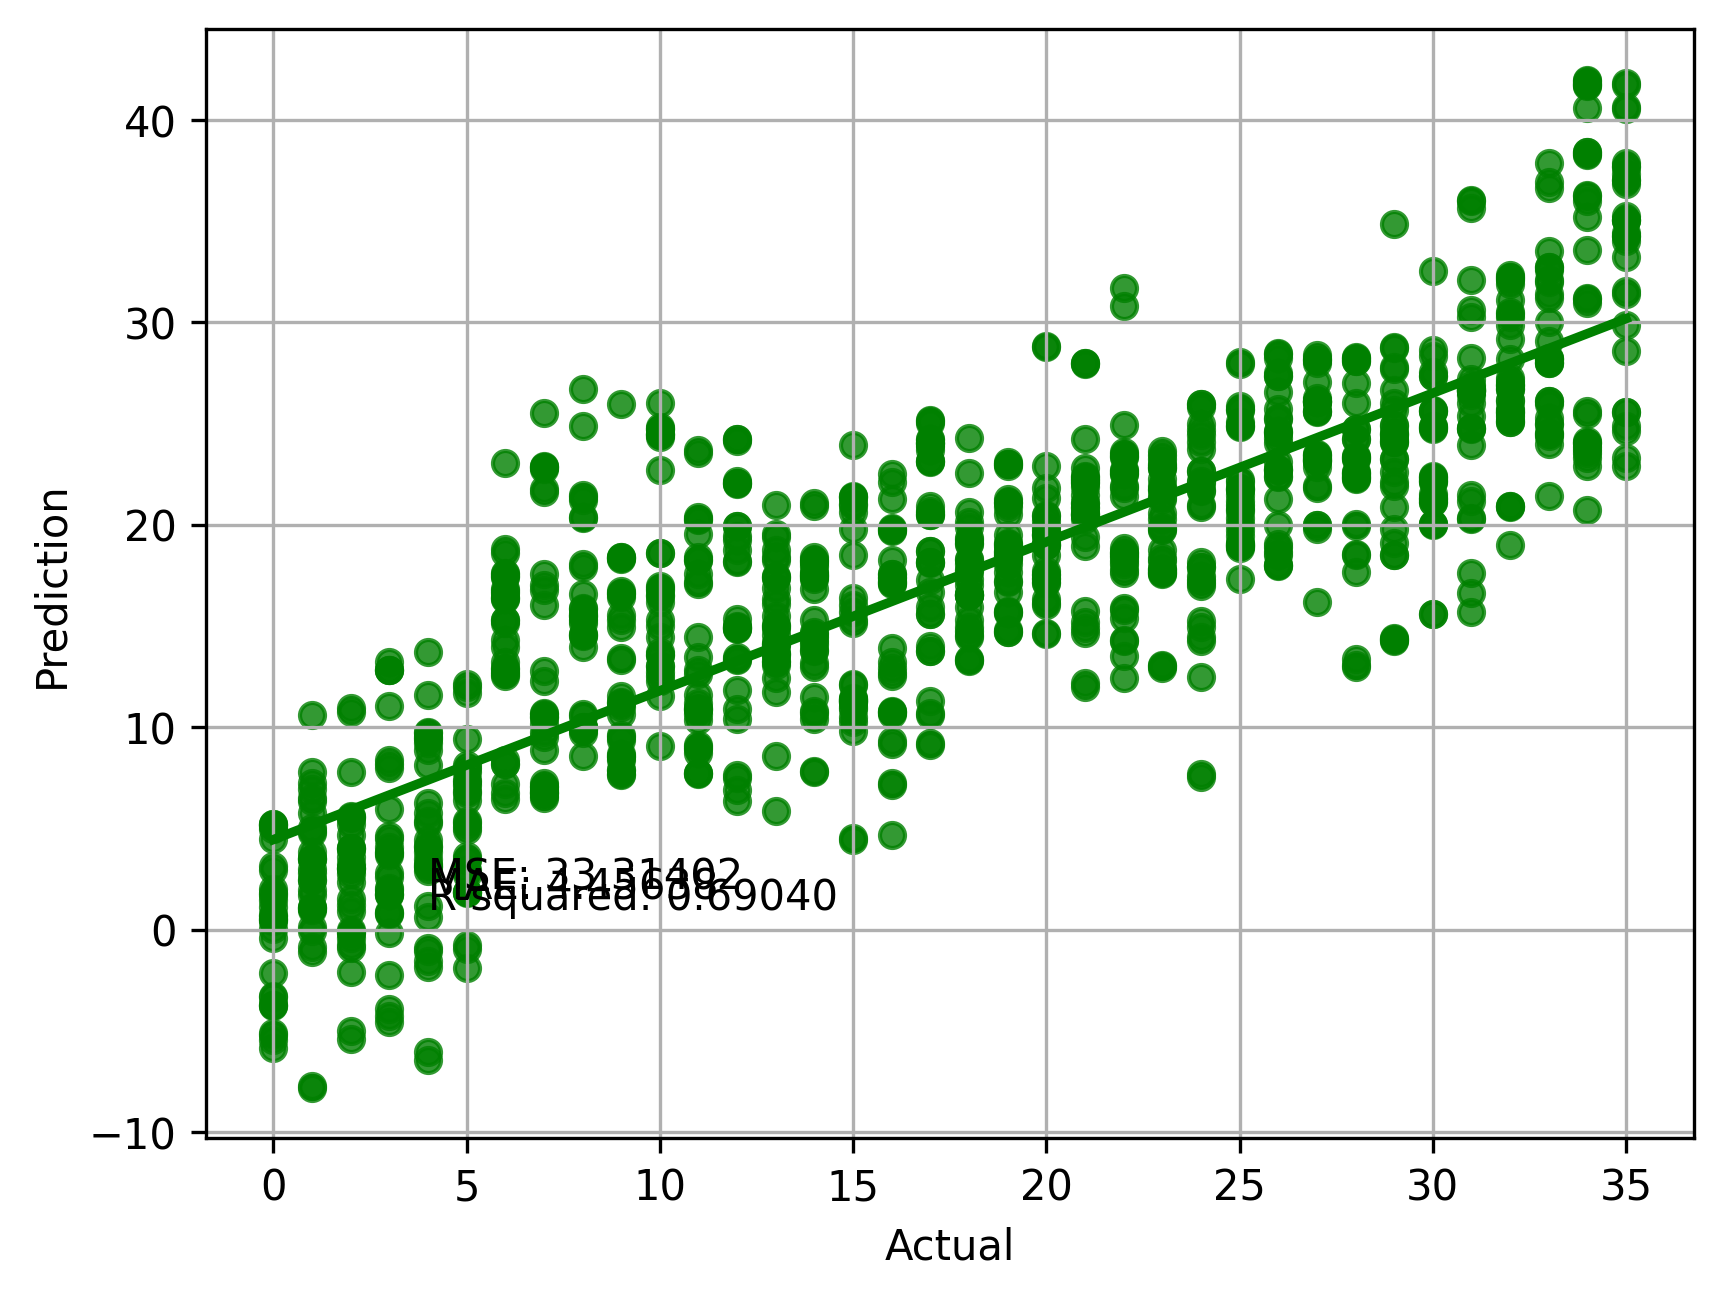

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(test_labels, y_pred)
mae = mean_absolute_error(test_labels, y_pred)
mse = mean_squared_error(test_labels, y_pred)


sns.regplot(x=test_labels, y=y_pred, ci=None, color ='green', scatter=True);
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.text(x=4, y=1, s="R-squared: %5.5f"%(r2))
plt.text(x=4, y=1.5, s="MAE: %5.5f"%(mae))
plt.text(x=4, y=2, s="MSE: %5.5f"%(mse))
plt.grid()
plt.show()

In [ ]:
pred_df=pd.DataFrame({'Actual Value':test_labels,'Predicted Value':y_pred,'Difference':(test_labels-y_pred)})
pred_df

Actual Value  Predicted Value  Difference
0              3         3.551743   -0.551743
1              1         1.169288   -0.169288
2              6         6.140153   -0.140153
3              0         1.666038   -1.666038
4              5         4.846034    0.153966
5              6         6.043953   -0.043953
6              3         2.917273    0.082727
7              5         5.048533   -0.048533
8              0        -0.410816    0.410816
9              1         0.083896    0.916104
10             0         0.966984   -0.966984
11             2         2.058079   -0.058079
12             6         6.155847   -0.155847
13             0         2.735772   -2.735772
14             3         2.923843    0.076157
15             1        -0.075551    1.075551
16             1         0.069465    0.930535
17             4         3.605919    0.394081
18             5         5.107972   -0.107972
19             0        -1.021791    1.021791
20             3         3.549941   -0.549941
21             2         2.670422   -0.670422
22             2         2.400961   -0.400961
23             7         6.810550    0.189450
24             4         4.161907   -0.161907
25             7         6.647854    0.352146
26             6         5.836423    0.163577
27             7         7.003374   -0.003374
28             3         2.819103    0.180897
29             7         6.612360    0.387640
30             5         5.032919   -0.032919
31             4         3.531643    0.468357
32             6         6.128885   -0.128885
33             0         0.320901   -0.320901
34             5         4.851114    0.148886
35             7         6.678203    0.321797
36             4         3.594865    0.405135
37             5         4.879526    0.120474
38             6         5.929572    0.070428
39             7         6.546782    0.453218
40             2         2.336308   -0.336308
41             4         3.302377    0.697623
42             2         2.079044   -0.079044
43             4         3.459079    0.540921
44             1         0.864488    0.135512
45             3         3.191917   -0.191917
46             1         0.077760    0.922240
47             2         2.085572   -0.085572

Feature: 0, Score: 7.41781
Feature: 1, Score: 0.65699
Feature: 2, Score: 0.47499
Feature: 3, Score: 4.81301
Feature: 4, Score: 16.24197
Feature: 5, Score: 0.40784
Feature: 6, Score: 7.78302
Feature: 7, Score: 1.06494
Feature: 8, Score: 7.50755
Feature: 9, Score: 0.18447
Feature: 10, Score: 5.19655
Feature: 11, Score: 0.48559
Feature: 12, Score: 0.57818
Feature: 13, Score: 6.32400
Feature: 14, Score: 0.05308
Feature: 15, Score: 0.12160
Feature: 16, Score: 5.71592
Feature: 17, Score: 6.03351
Feature: 18, Score: 3.28775
Feature: 19, Score: 5.69585
Feature: 20, Score: 3.81903
Feature: 21, Score: 1.09873
Feature: 22, Score: 21.81735
Feature: 23, Score: 7.65602
Feature: 24, Score: 13.11567
Feature: 25, Score: 5.19418
Feature: 26, Score: 0.47494
Feature: 27, Score: 0.21584
Feature: 28, Score: 9.26067
Feature: 29, Score: 0.40753
Feature: 30, Score: 0.78920
Feature: 31, Score: 0.05610
Feature: 32, Score: 7.50752
Feature: 33, Score: 0.12112
Feature: 34, Score: 0.03462
Feature: 35, Score: 0.48505

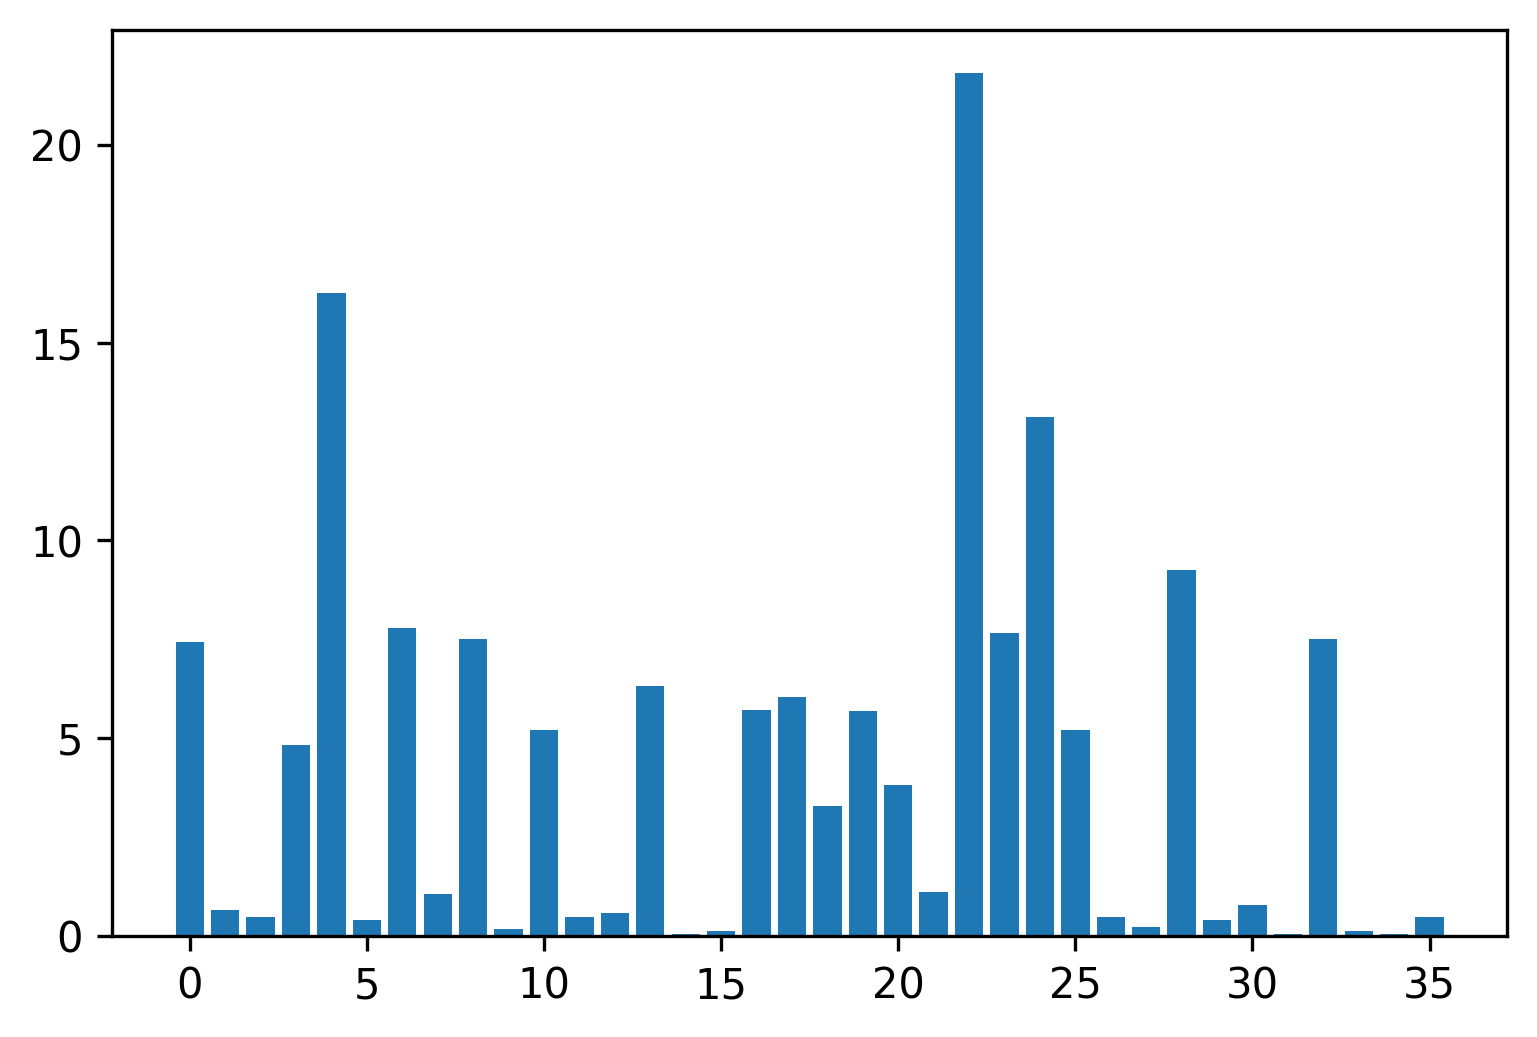

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(regressor, test_features, test_labels, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## DNN

In [ ]:
# Untuk membagi dataset menjadi data training dan data testing

from sklearn.model_selection import train_test_split
train_df, test_df, train_labels, test_labels = train_test_split(X, y,
                                                                test_size = 0.3, random_state = 128, stratify= y)
train_df, val_df, train_labels, val_labels = train_test_split(train_df, train_labels,
                                                                test_size = 0.1, random_state = 128, stratify= train_labels)

NameError: ignored

In [ ]:
train_features = np.array(train_df)

val_features = np.array(val_df)

test_features = np.array(test_df)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (100,)
Validation labels shape: (12,)
Test labels shape: (48,)
Training features shape: (100, 36)
Validation features shape: (12, 36)
Test features shape: (48, 36)


In [ ]:
# Scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (100,)
Validation labels shape: (12,)
Test labels shape: (48,)
Training features shape: (100, 36)
Validation features shape: (12, 36)
Test features shape: (48, 36)


In [ ]:
def create_model(train_features):
  input_csv = layers.Input(shape=(train_features.shape[1],))

  x = Dense(1024, activation='relu')(input_csv)
  x = Dense(512, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = Dropout(0.5)(x)
  x = Dense(128, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = Dropout(0.5)(x)
  x = Dense(64, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = Dropout(0.5)(x)
  x = Dense(16, activation='relu')(x)
  x = layers.Dense(1, activation='linear')(x)
  model = models.Model(inputs=input_csv, outputs=x)
  return model

In [ ]:
model = create_model(train_features)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36)]              0         
                                                                 
 dense (Dense)               (None, 1024)              37888     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                             

In [ ]:
from tensorflow import keras

model.compile(loss='mean_absolute_error',
              optimizer=keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics=['mae', 'mse'])

In [ ]:
from keras.callbacks import CSVLogger

#csv_logger = CSVLogger('training.log', separator=',', append=False)

history = model.fit(train_features, train_labels,
                    epochs=500, batch_size=60,
                    validation_data=(val_features, val_labels))
                    #callbacks=[csv_logger])

Epoch 1/500
2/2 [==============================] - 3s 302ms/step - loss: 4.1560 - mae: 4.1560 - mse: 23.9904 - val_loss: 3.6315 - val_mae: 3.6315 - val_mse: 17.7311
Epoch 2/500
2/2 [==============================] - 0s 58ms/step - loss: 4.0824 - mae: 4.0824 - mse: 22.0371 - val_loss: 3.5193 - val_mae: 3.5193 - val_mse: 16.8423
Epoch 3/500
2/2 [==============================] - 0s 41ms/step - loss: 3.9546 - mae: 3.9546 - mse: 21.9941 - val_loss: 3.5299 - val_mae: 3.5299 - val_mse: 17.1658
Epoch 4/500
2/2 [==============================] - 0s 43ms/step - loss: 3.6921 - mae: 3.6921 - mse: 19.2867 - val_loss: 3.4174 - val_mae: 3.4174 - val_mse: 16.8804
Epoch 5/500
2/2 [==============================] - 0s 63ms/step - loss: 3.8087 - mae: 3.8087 - mse: 19.2323 - val_loss: 3.4171 - val_mae: 3.4171 - val_mse: 16.5293
Epoch 6/500
2/2 [==============================] - 0s 62ms/step - loss: 3.4185 - mae: 3.4185 - mse: 16.4470 - val_loss: 3.3879 - val_mae: 3.3879 - val_mse: 16.0095
Epoch 7/500
2/2

In [ ]:
model.evaluate(test_features, test_labels)

2/2 [==============================] - 0s 8ms/step - loss: 0.1044 - mae: 0.1044 - mse: 0.0240


[0.10444492101669312, 0.10444492101669312, 0.024033134803175926]

In [ ]:
model.save('/content/drive/MyDrive/model_Reg_Ikan.h5')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

predictions = model.predict(test_features).flatten()
rmse, mae, score = np.sqrt(mean_squared_error(test_labels, predictions)), mean_absolute_error(test_labels, predictions), r2_score(test_labels, predictions)
print("R2: %5.3f, RMSE: %5.3f, MAE: %5.3f" %(score, rmse, mae))

2/2 [==============================] - 0s 7ms/step
R2: 0.995, RMSE: 0.155, MAE: 0.104


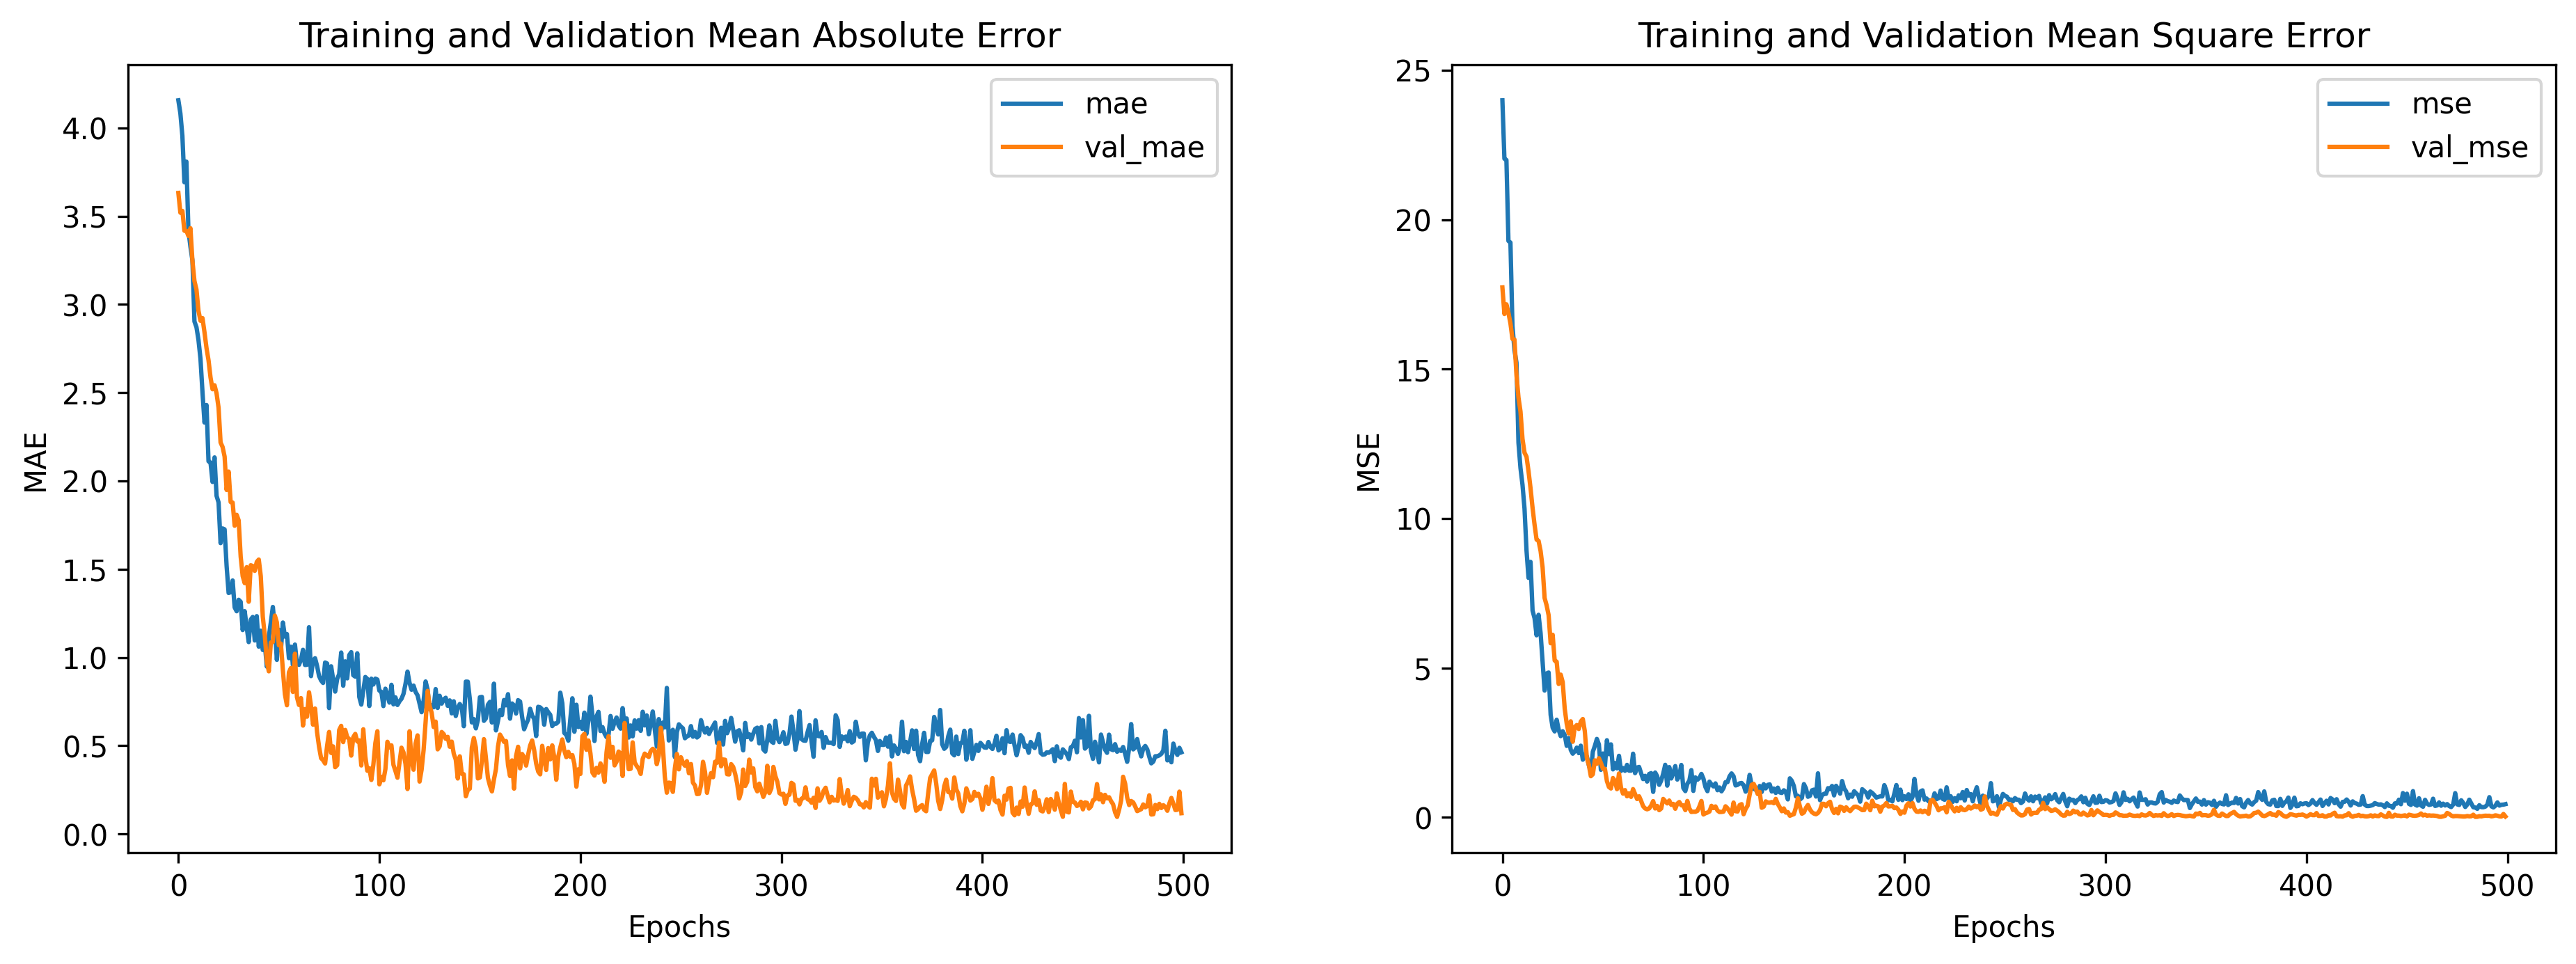

In [ ]:
metrics = history.history
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['mae'], metrics['val_mae'])
plt.legend(['mae', 'val_mae'])
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')

plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['mse'], metrics['val_mse'])
plt.legend(['mse', 'val_mse'])
plt.title('Training and Validation Mean Square Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

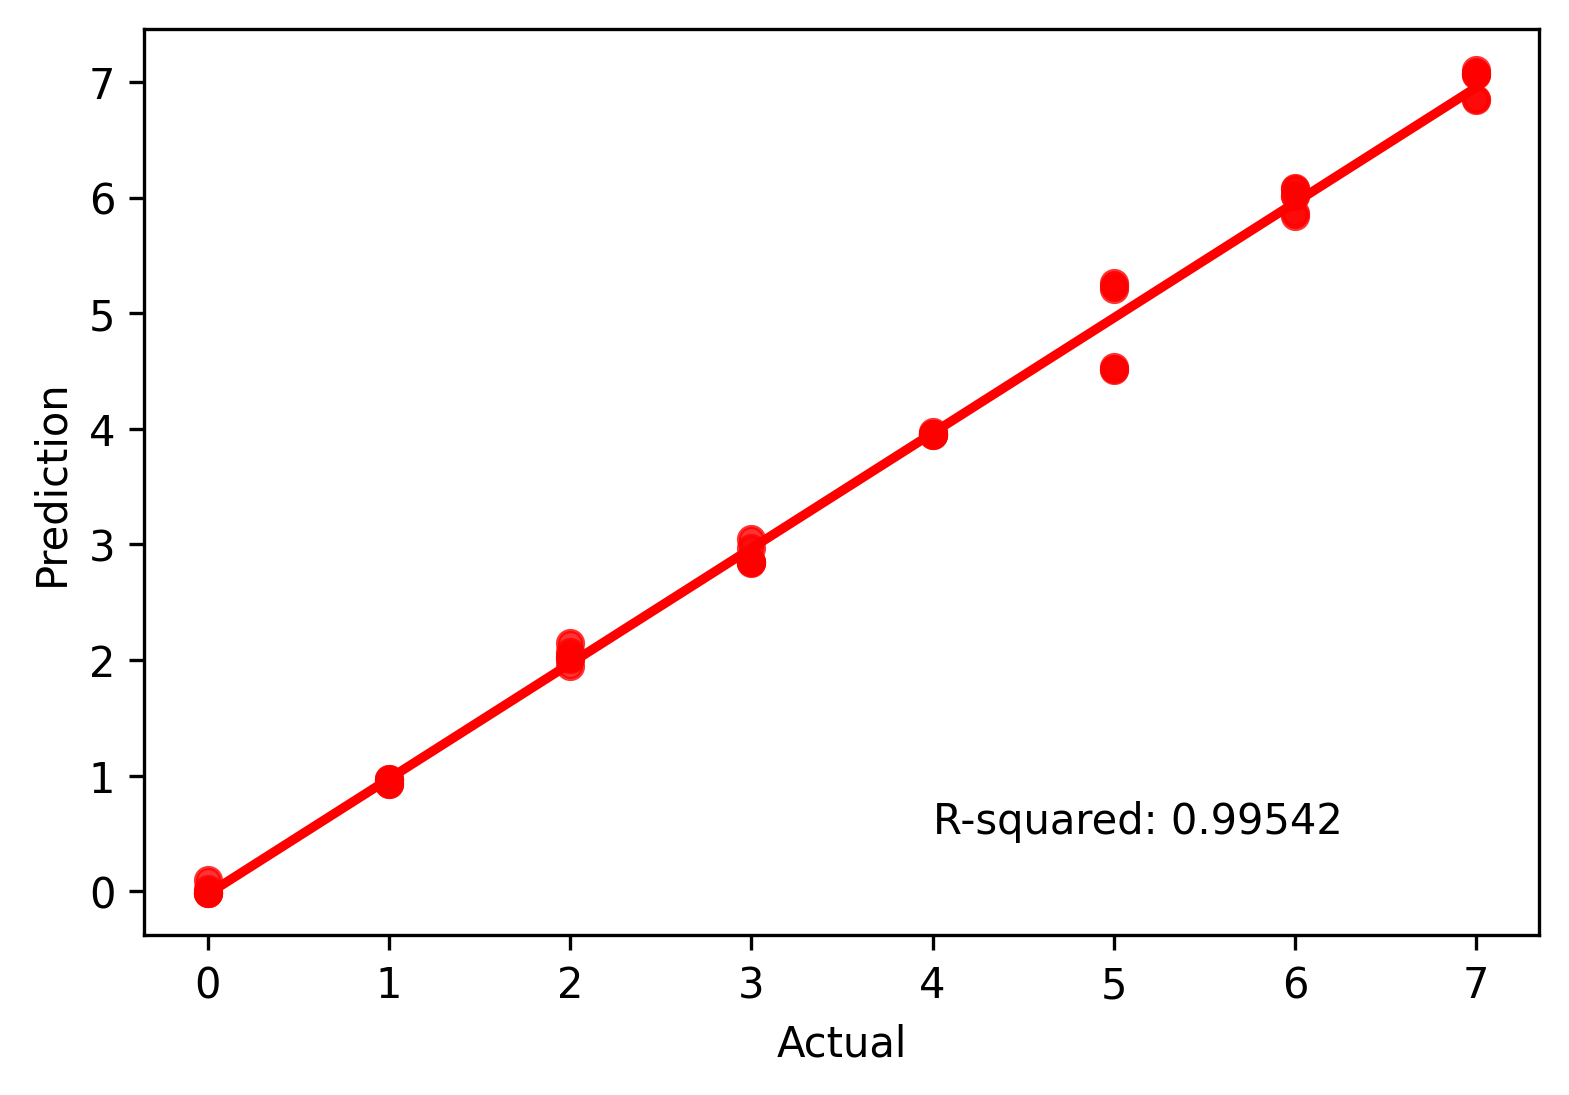

In [ ]:
sns.regplot(x=test_labels, y=predictions, ci=None, color ='red', scatter=True);
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.text(x=4, y=0.5, s="R-squared: %5.5f"%(score))
plt.show()

In [ ]:
pred_df=pd.DataFrame({'Actual Value':test_labels,'Predicted Value':predictions,'Difference':(test_labels-predictions)})
pred_df

Actual Value  Predicted Value  Difference
0              3         3.044543   -0.044543
1              1         0.971175    0.028825
2              6         6.025016   -0.025016
3              0         0.016574   -0.016574
4              5         4.507625    0.492375
5              6         5.868218    0.131782
6              3         2.844071    0.155929
7              5         4.519005    0.480995
8              0        -0.015169    0.015169
9              1         0.960486    0.039514
10             0        -0.009080    0.009080
11             2         2.011568   -0.011568
12             6         6.078700   -0.078700
13             0         0.102172   -0.102172
14             3         2.840620    0.159380
15             1         0.924823    0.075177
16             1         0.933364    0.066636
17             4         3.958077    0.041923
18             5         4.538303    0.461697
19             0        -0.016153    0.016153
20             3         2.965253    0.034747
21             2         2.145471   -0.145471
22             2         2.068150   -0.068150
23             7         7.059831   -0.059831
24             4         3.946460    0.053540
25             7         7.079226   -0.079226
26             6         5.841630    0.158370
27             7         6.847227    0.152773
28             3         2.846676    0.153324
29             7         7.100493   -0.100493
30             5         5.262597   -0.262597
31             4         3.947632    0.052368
32             6         6.070179   -0.070179
33             0        -0.012402    0.012402
34             5         5.235329   -0.235329
35             7         7.072877   -0.072877
36             4         3.953290    0.046710
37             5         5.213328   -0.213328
38             6         6.016134   -0.016134
39             7         6.853304    0.146696
40             2         2.033901   -0.033901
41             4         3.975900    0.024100
42             2         1.949904    0.050096
43             4         3.953464    0.046536
44             1         0.972778    0.027222
45             3         2.846008    0.153992
46             1         0.927767    0.072233
47             2         2.017525   -0.017525

# DNN Klasifikasi Jenis Ikan

In [ ]:
#@title Default title text
def getNumber(str):
    if str=="Nila":
        return 0
    elif str=="Gurami":
        return 1

df2["Jenis_Ikan"] = df2["Jenis_Ikan"].apply(getNumber)

df2

Unnamed: 0                                           filename  \
0             0  /content/drive/MyDrive/Ikan/ikan/Gurami/6/WIN_...   
1             1  /content/drive/MyDrive/Ikan/ikan/Gurami/6/WIN_...   
2             2  /content/drive/MyDrive/Ikan/ikan/Gurami/6/WIN_...   
3             3  /content/drive/MyDrive/Ikan/ikan/Gurami/6/WIN_...   
4             4  /content/drive/MyDrive/Ikan/ikan/Gurami/6/WIN_...   
..          ...                                                ...   
155         155  /content/drive/MyDrive/Ikan/ikan/Nila/6/WIN_20...   
156         156  /content/drive/MyDrive/Ikan/ikan/Nila/6/WIN_20...   
157         157  /content/drive/MyDrive/Ikan/ikan/Nila/6/WIN_20...   
158         158  /content/drive/MyDrive/Ikan/ikan/Nila/6/WIN_20...   
159         159  /content/drive/MyDrive/Ikan/ikan/Nila/6/WIN_20...   

     Jenis_Ikan    r_mean      g_mean      b_mean     r_std      g_std  \
0             1  4.301381  110.650375  179.628125  6.979327  26.732674   
1             1  4.607544  111.283019  180.360931  7.502131  26.733823   
2             1  4.422850  110.934737  180.078025  7.181970  26.635551   
3             1  4.358975  110.803919  179.683906  6.967632  26.741489   
4             1  4.396356  110.806219  179.707881  7.173856  26.680749   
..          ...       ...         ...         ...       ...        ...   
155           0  4.198294   36.685731   99.414969  5.839879  14.804330   
156           0  4.135081   36.618444   99.434412  5.726227  14.685989   
157           0  4.171337   36.795025   99.846806  5.793665  14.787020   
158           0  4.088738   36.603531   99.377337  5.751428  14.536808   
159           0  4.149700   36.774088   99.577875  5.776257  14.637894   

         b_std      r_sk  ...      V_mean     H_std      S_std      V_std  \
0    39.772001  2.625660  ...  179.628125  1.699821  13.796422  39.772001   
1    39.772739  2.650178  ...  180.360931  1.697262  14.583458  39.772739   
2    39.573794  2.628591  ...  180.078025  1.708483  14.240446  39.573794   
3    39.779766  2.577695  ...  179.683906  1.727788  13.863245  39.779766   
4    39.642460  2.689229  ...  179.707881  1.725432  14.094423  39.642460   
..         ...       ...  ...         ...       ...        ...        ...   
155  49.758273  2.251884  ...   99.414969  3.077234  19.409789  49.758273   
156  49.320324  2.253746  ...   99.434412  3.101955  18.911492  49.320324   
157  49.860042  2.361396  ...   99.846806  3.156050  19.234013  49.860042   
158  49.060678  2.364026  ...   99.377337  3.116236  19.041752  49.060678   
159  49.217443  2.331057  ...   99.577875  3.170983  18.952999  49.217443   

         H_sk      S_sk      V_sk       H_ku       S_ku      V_ku  
0   -1.104388 -2.902470 -0.488973   2.061594   9.945546 -0.185618  
1   -1.154705 -2.845599 -0.479543   2.268118   9.408342 -0.207471  
2   -1.122477 -2.913190 -0.494928   2.076241  10.004020 -0.178784  
3   -1.109899 -2.949902 -0.482995   2.119219  10.917588 -0.200917  
4   -1.117737 -2.921524 -0.496655   2.150824  10.095443 -0.187365  
..        ...       ...       ...        ...        ...       ...  
155  0.056382 -1.470313  0.945430  -0.757320   1.419378 -0.065394  
156  0.092135 -1.443414  0.954928  -0.714565   1.299975 -0.030581  
157  1.893739 -1.477481  0.920286  94.345712   1.519049 -0.127890  
158  0.076266 -1.499224  0.948968  -0.749755   1.497651 -0.030860  
159  1.898282 -1.474071  0.951964  94.752923   1.466500 -0.024732  

[160 rows x 39 columns]

In [ ]:
y = df2.pop('Jenis_Ikan')
X = df2.iloc[:, 2:]

In [ ]:
# Untuk membagi dataset menjadi data training dan data testing

from sklearn.model_selection import train_test_split
train_df, test_df, train_labels, test_labels = train_test_split(X, y,
                                                                test_size = 0.3, random_state = 128, stratify= y)
train_df, val_df, train_labels, val_labels = train_test_split(train_df, train_labels,
                                                                test_size = 0.1, random_state = 128, stratify= train_labels)

In [ ]:
train_features = np.array(train_df)

val_features = np.array(val_df)

test_features = np.array(test_df)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (100,)
Validation labels shape: (12,)
Test labels shape: (48,)
Training features shape: (100, 36)
Validation features shape: (12, 36)
Test features shape: (48, 36)


In [ ]:
# Scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (100,)
Validation labels shape: (12,)
Test labels shape: (48,)
Training features shape: (100, 36)
Validation features shape: (12, 36)
Test features shape: (48, 36)


In [ ]:
def create_model(train_features):
  input_csv = layers.Input(shape=(train_features.shape[1],))

  x = Dense(64, activation='relu')(input_csv)
  x = layers.BatchNormalization()(x)
  x = Dropout(0.5)(x)
  x = Dense(32, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = Dropout(0.5)(x)
  x = Dense(16, activation='relu')(x)
  x = layers.Dense(2, activation='softmax')(x)
  model = models.Model(inputs=input_csv, outputs=x)
  return model

In [ ]:
model = create_model(train_features)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 36)]              0         
                                                                 
 dense_6 (Dense)             (None, 64)                2368      
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                           

In [ ]:
from tensorflow import keras

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(),
              metrics='accuracy')

In [ ]:
from keras.callbacks import CSVLogger

history = model.fit(train_features, train_labels,
                    epochs=100, batch_size=20,
                    validation_data=(val_features, val_labels))

Epoch 1/100
5/5 [==============================] - 1s 60ms/step - loss: 0.7238 - accuracy: 0.6300 - val_loss: 0.5532 - val_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 0.5025 - accuracy: 0.7200 - val_loss: 0.4954 - val_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.4374 - accuracy: 0.7700 - val_loss: 0.4413 - val_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 0.3483 - accuracy: 0.8700 - val_loss: 0.3959 - val_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 0.3362 - accuracy: 0.8700 - val_loss: 0.3527 - val_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.2835 - accuracy: 0.9300 - val_loss: 0.3131 - val_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 0.2302 - accuracy: 0.9400 - val_loss: 0.2773 - val_accuracy: 1.0000
Epoch 8/100
5/5 [=======

In [ ]:
model.evaluate(test_features, test_labels)

2/2 [==============================] - 0s 5ms/step - loss: 8.2774e-05 - accuracy: 1.0000


[8.277353481389582e-05, 1.0]

In [ ]:
model.save('/content/drive/MyDrive/model_Class_Ikan.h5')

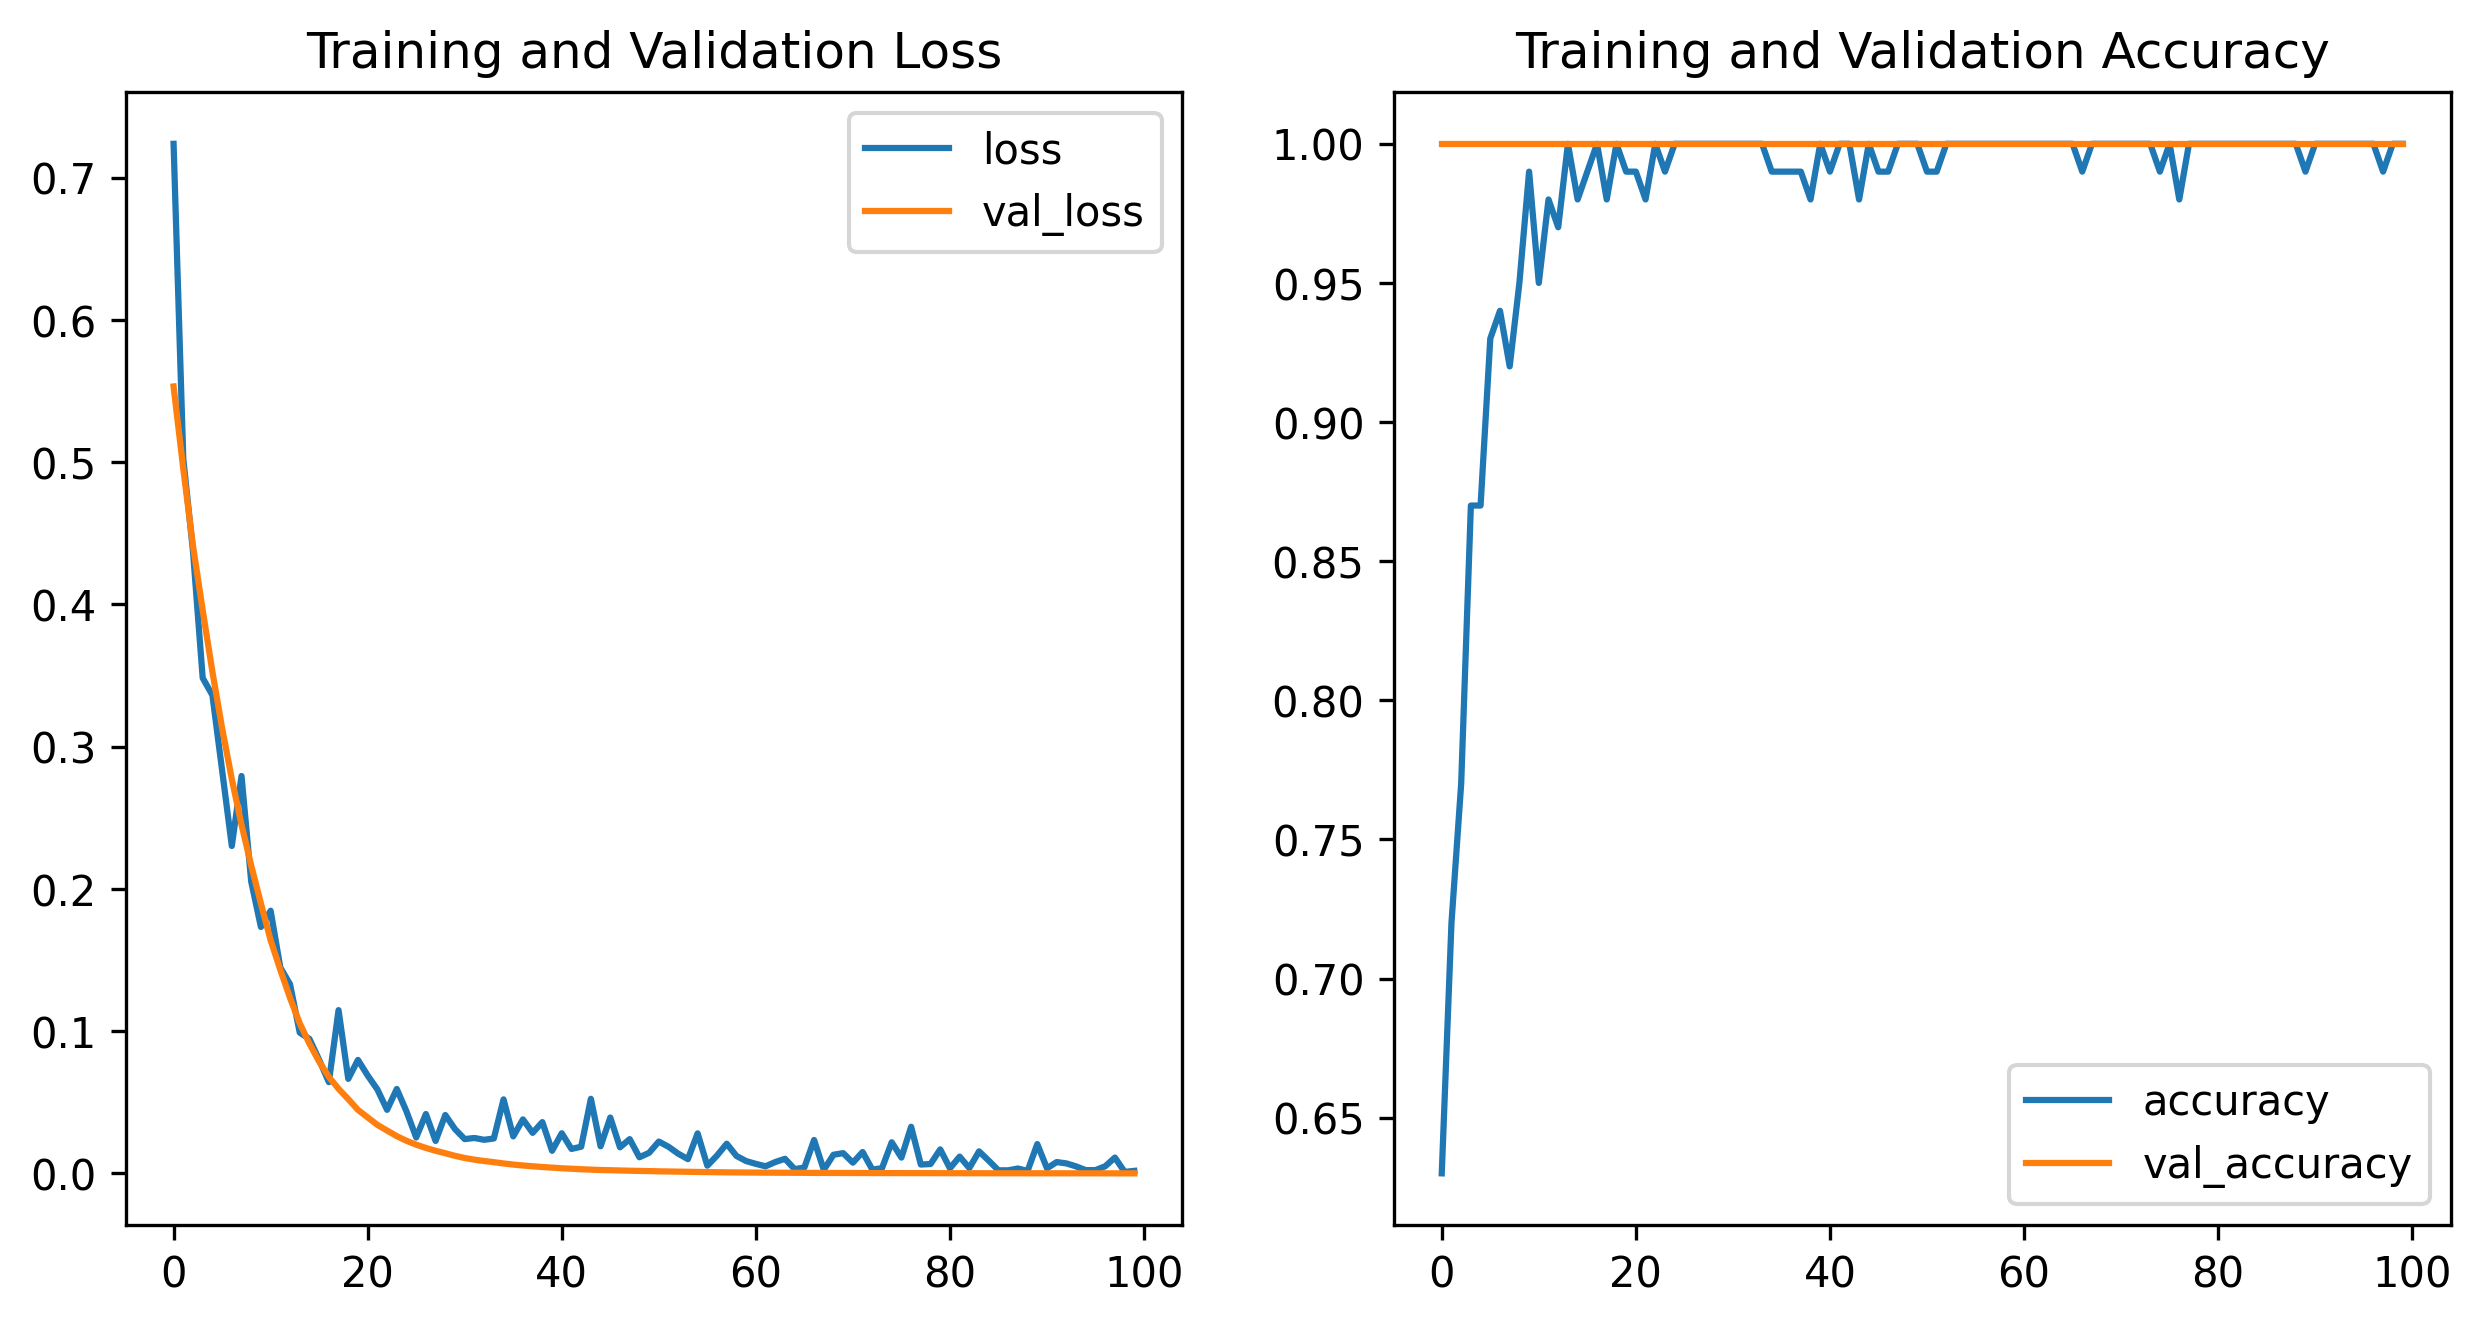

In [ ]:
metrics = history.history
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Training and Validation Loss')
plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(test_features), axis=1)
y_true = test_labels

print(classification_report(y_true, y_pred))

2/2 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



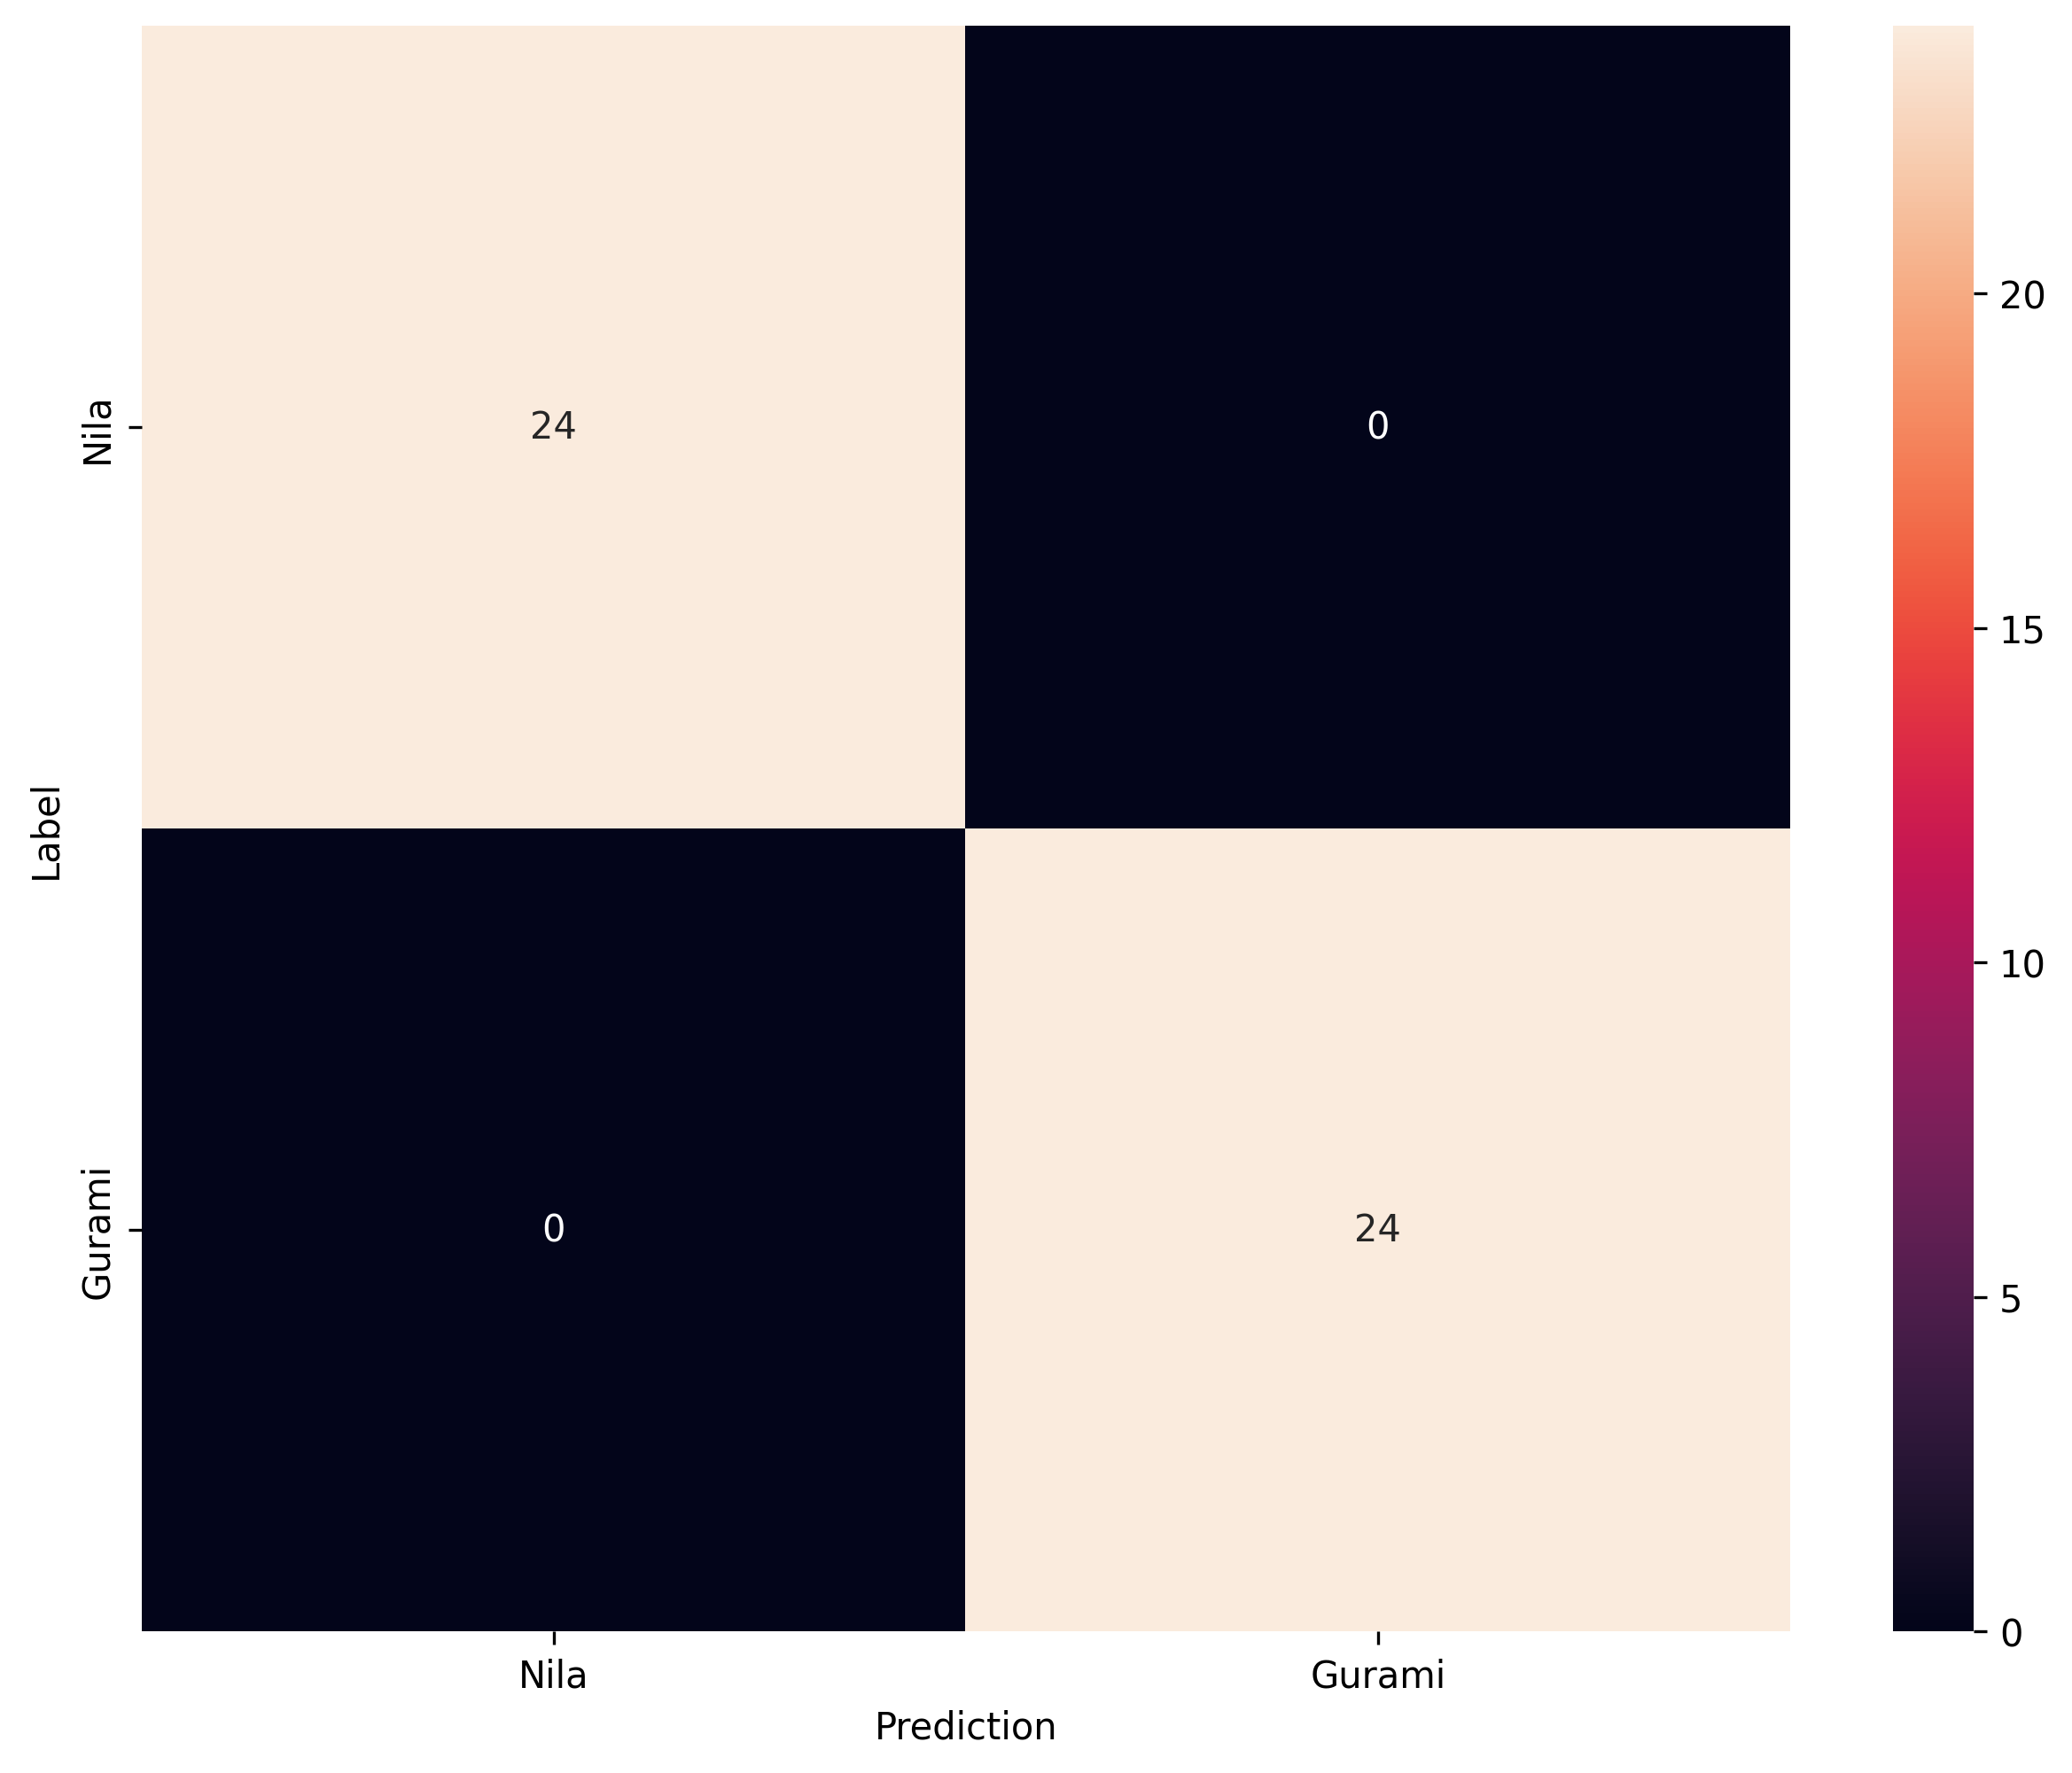

In [ ]:
class_names = ['Nila','Gurami']
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=class_names,
            yticklabels=class_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# **KESEGARAN**


INTERPOLASI

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/HasilEkstraksiIkanBaru.csv')
df3

Unnamed: 0                                           filename  \
0              0  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
1              1  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
2              2  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
3              3  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
4              4  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
...          ...                                                ...   
3622        3622  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   
3623        3623  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   
3624        3624  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   
3625        3625  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   
3626        3626  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   

     Jenis_Ikan  Waktu     r_mean     g_mean     b_mean      r_std      g_std  \
0        Gurame      0  12.688463  52.797656  84.980960  21.835684  33.303251   
1        Gurame      0  12.710492  53.043152  85.322934  21.857903  33.365600   
2        Gurame      0  12.474443  52.598021  84.938961  21.852359  33.278269   
3        Gurame      0  12.589401  52.967191  85.341356  21.840003  33.373694   
4        Gurame      0  12.593951  53.033367  85.444456  21.863773  33.384001   
...         ...    ...        ...        ...        ...        ...        ...   
3622     Gurame     22  17.755462  53.495387  72.147763  28.066865  56.254826   
3623     Gurame     22  17.779990  53.358471  72.068259  28.063733  56.145769   
3624     Gurame     22  17.867484  53.617232  72.245013  28.186398  56.351080   
3625     Gurame     22  18.050754  53.773385  72.367563  28.305726  56.441862   
3626     Gurame     22  18.064258  53.937742  72.554001  28.388829  56.557507   

          b_std  ...     V_mean      H_std      S_std      V_std       H_sk  \
0     46.259581  ...  85.015520  12.335983  52.218920  46.243201   9.765476   
1     46.380895  ...  85.355335  11.419885  52.601275  46.366517  10.270215   
2     46.307690  ...  84.969255  11.826592  52.152900  46.293236  10.073021   
3     46.374993  ...  85.375930  11.646674  51.880356  46.360036  10.278611   
4     46.356473  ...  85.473900  11.271387  51.776385  46.346747  10.495772   
...         ...  ...        ...        ...        ...        ...        ...   
3622  76.125505  ...  74.805660  58.347890  91.750405  75.288417   1.146675   
3623  76.096083  ...  74.704465  58.608514  91.850803  75.263280   1.134293   
3624  76.212301  ...  74.890453  58.385372  91.774292  75.376665   1.160203   
3625  76.303024  ...  75.052314  58.172746  91.694461  75.448286   1.149821   
3626  76.417486  ...  75.221158  58.382472  91.740671  75.565671   1.154141   

          S_sk      V_sk        H_ku      S_ku      V_ku  
0    -2.081730  0.147116  114.870899  4.516180 -0.750598  
1    -2.088535  0.140133  132.332913  4.542748 -0.753178  
2    -2.111505  0.146545  123.835083  4.651953 -0.752283  
3    -2.074494  0.142859  130.208015  4.500720 -0.754917  
4    -2.104139  0.134954  136.493280  4.664802 -0.765878  
...        ...       ...         ...       ...       ...  
3622 -0.729568  0.704641   -0.261618 -0.919329 -0.744114  
3623 -0.718117  0.706504   -0.296669 -0.936546 -0.742952  
3624 -0.727699  0.704399   -0.227381 -0.922421 -0.744481  
3625 -0.721027  0.703276   -0.248480 -0.930243 -0.746808  
3626 -0.721898  0.700023   -0.238730 -0.928857 -0.751950  

[3627 rows x 40 columns]

In [ ]:
df3['TvB'] = 0.0
for i in range(len(df3)):
  h = df3.Waktu.values[i]
  jam = [3, 6, 12, 18, 24, 35]
  tvb = [16.16, 17.22, 21.93, 24.73, 105.86, 240.3]
  if h in jam:
    df3['TvB'].loc[df3['Waktu'] == h] = tvb[jam.index(h)]

df3

<ipython-input-34-cda589b985e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['TvB'].loc[df3['Waktu'] == h] = tvb[jam.index(h)]


Unnamed: 0                                           filename  \
0              0  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
1              1  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
2              2  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
3              3  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
4              4  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
...          ...                                                ...   
3622        3622  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   
3623        3623  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   
3624        3624  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   
3625        3625  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   
3626        3626  /content/drive/MyDrive/Gurame/INSANG/22/WIN_20...   

     Jenis_Ikan  Waktu     r_mean     g_mean     b_mean      r_std      g_std  \
0        Gurame      0  12.688463  52.797656  84.980960  21.835684  33.303251   
1        Gurame      0  12.710492  53.043152  85.322934  21.857903  33.365600   
2        Gurame      0  12.474443  52.598021  84.938961  21.852359  33.278269   
3        Gurame      0  12.589401  52.967191  85.341356  21.840003  33.373694   
4        Gurame      0  12.593951  53.033367  85.444456  21.863773  33.384001   
...         ...    ...        ...        ...        ...        ...        ...   
3622     Gurame     22  17.755462  53.495387  72.147763  28.066865  56.254826   
3623     Gurame     22  17.779990  53.358471  72.068259  28.063733  56.145769   
3624     Gurame     22  17.867484  53.617232  72.245013  28.186398  56.351080   
3625     Gurame     22  18.050754  53.773385  72.367563  28.305726  56.441862   
3626     Gurame     22  18.064258  53.937742  72.554001  28.388829  56.557507   

          b_std  ...      H_std      S_std      V_std       H_sk      S_sk  \
0     46.259581  ...  12.335983  52.218920  46.243201   9.765476 -2.081730   
1     46.380895  ...  11.419885  52.601275  46.366517  10.270215 -2.088535   
2     46.307690  ...  11.826592  52.152900  46.293236  10.073021 -2.111505   
3     46.374993  ...  11.646674  51.880356  46.360036  10.278611 -2.074494   
4     46.356473  ...  11.271387  51.776385  46.346747  10.495772 -2.104139   
...         ...  ...        ...        ...        ...        ...       ...   
3622  76.125505  ...  58.347890  91.750405  75.288417   1.146675 -0.729568   
3623  76.096083  ...  58.608514  91.850803  75.263280   1.134293 -0.718117   
3624  76.212301  ...  58.385372  91.774292  75.376665   1.160203 -0.727699   
3625  76.303024  ...  58.172746  91.694461  75.448286   1.149821 -0.721027   
3626  76.417486  ...  58.382472  91.740671  75.565671   1.154141 -0.721898   

          V_sk        H_ku      S_ku      V_ku  TvB  
0     0.147116  114.870899  4.516180 -0.750598  0.0  
1     0.140133  132.332913  4.542748 -0.753178  0.0  
2     0.146545  123.835083  4.651953 -0.752283  0.0  
3     0.142859  130.208015  4.500720 -0.754917  0.0  
4     0.134954  136.493280  4.664802 -0.765878  0.0  
...        ...         ...       ...       ...  ...  
3622  0.704641   -0.261618 -0.919329 -0.744114  0.0  
3623  0.706504   -0.296669 -0.936546 -0.742952  0.0  
3624  0.704399   -0.227381 -0.922421 -0.744481  0.0  
3625  0.703276   -0.248480 -0.930243 -0.746808  0.0  
3626  0.700023   -0.238730 -0.928857 -0.751950  0.0  

[3627 rows x 41 columns]

In [ ]:
df3 = df3.sort_values(by=['Waktu'])
df3

Unnamed: 0                                           filename  \
0              0  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
1473        1473  /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...   
1472        1472  /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...   
1471        1471  /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...   
1470        1470  /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...   
...          ...                                                ...   
1951        1951  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...   
1952        1952  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...   
1953        1953  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...   
1955        1955  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...   
1813        1813  /content/drive/MyDrive/Gurame/SURFACE/35/WIN_2...   

     Jenis_Ikan  Waktu     r_mean      g_mean      b_mean      r_std  \
0        Gurame      0  12.688463   52.797656   84.980960  21.835684   
1473     Gurame      0   9.425711   28.074802   41.795097  19.649597   
1472     Gurame      0   9.415537   27.987493   41.584243  19.680675   
1471     Gurame      0   9.047212   27.710525   41.554267  19.320493   
1470     Gurame      0   9.362732   27.959502   41.704841  19.583550   
...         ...    ...        ...         ...         ...        ...   
1951     Gurame     35  70.030851  112.986835  145.836471  45.988735   
1952     Gurame     35  69.882754  112.772294  145.698225  46.071448   
1953     Gurame     35  70.157449  113.188009  146.085007  46.128667   
1955     Gurame     35  41.562483   75.241835   96.261408  37.989111   
1813     Gurame     35  97.421589  119.773803  133.013732  45.669479   

          g_std      b_std  ...      H_std      S_std      V_std      H_sk  \
0     33.303251  46.259581  ...  12.335983  52.218920  46.243201  9.765476   
1473  31.600229  41.278492  ...  34.081136  99.187679  41.294999  3.557878   
1472  31.548247  41.112697  ...  34.643304  99.331331  41.143333  3.507718   
1471  31.366317  41.213545  ...  34.179153  99.818254  41.237972  3.599432   
1470  31.497861  41.185483  ...  34.106809  99.349279  41.210102  3.593560   
...         ...        ...  ...        ...        ...        ...       ...   
1951  52.900485  75.261265  ...  33.236620  72.065463  71.832948  1.777198   
1952  52.844461  75.168892  ...  33.159688  72.185853  71.790745  1.768447   
1953  52.928967  75.156580  ...  33.140207  72.091614  71.811457  1.789045   
1955  55.008739  74.652540  ...  49.245883  76.202625  73.937827  1.697608   
1813  56.131905  66.199117  ...  38.108367  53.052422  64.664699  1.869950   

          S_sk      V_sk        H_ku      S_ku      V_ku    TvB  
0    -2.081730  0.147116  114.870899  4.516180 -0.750598    0.0  
1473 -0.785663  0.798001   12.507769 -1.030280 -0.218600    0.0  
1472 -0.782809  0.807263   12.046933 -1.035532 -0.195654    0.0  
1471 -0.791715  0.805119   12.780487 -1.034407 -0.221188    0.0  
1470 -0.781760  0.802606   12.741129 -1.038844 -0.214661    0.0  
...        ...       ...         ...       ...       ...    ...  
1951  0.021987 -0.151916    2.037311 -1.107948 -1.266266  240.3  
1952  0.031767 -0.149542    1.960727 -1.112656 -1.265431  240.3  
1953  0.025739 -0.152645    2.083764 -1.114065 -1.264935  240.3  
1955  0.016359  0.742422    1.597535 -1.188372 -0.632871  240.3  
1813  0.984604 -0.374687    2.752751  0.885838 -0.469422  240.3  

[3627 rows x 41 columns]

In [ ]:
hours = pd.date_range('6/2/2023', periods=36, freq='H')
series = pd.DataFrame(hours, columns=['Date'])
series['TvB'] = np.nan
for i in range(len(series)):
  #jam = [0, 3, 6, 12, 18, 24, 35]
  #tvb = [10, 16.16, 17.22, 21.93, 24.73, 105.86, 240.3]

  jam = [3, 6, 12, 16, 24, 35]
  tvb = [16.16, 17.22, 21.93, 24.73, 105.86, 240.3]
  if i in jam:
    series['TvB'].loc[i] = tvb[jam.index(i)]

series

<ipython-input-36-62b6bc7ccfa9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['TvB'].loc[i] = tvb[jam.index(i)]


Date     TvB
0  2023-06-02 00:00:00     NaN
1  2023-06-02 01:00:00     NaN
2  2023-06-02 02:00:00     NaN
3  2023-06-02 03:00:00   16.16
4  2023-06-02 04:00:00     NaN
5  2023-06-02 05:00:00     NaN
6  2023-06-02 06:00:00   17.22
7  2023-06-02 07:00:00     NaN
8  2023-06-02 08:00:00     NaN
9  2023-06-02 09:00:00     NaN
10 2023-06-02 10:00:00     NaN
11 2023-06-02 11:00:00     NaN
12 2023-06-02 12:00:00   21.93
13 2023-06-02 13:00:00     NaN
14 2023-06-02 14:00:00     NaN
15 2023-06-02 15:00:00     NaN
16 2023-06-02 16:00:00   24.73
17 2023-06-02 17:00:00     NaN
18 2023-06-02 18:00:00     NaN
19 2023-06-02 19:00:00     NaN
20 2023-06-02 20:00:00     NaN
21 2023-06-02 21:00:00     NaN
22 2023-06-02 22:00:00     NaN
23 2023-06-02 23:00:00     NaN
24 2023-06-03 00:00:00  105.86
25 2023-06-03 01:00:00     NaN
26 2023-06-03 02:00:00     NaN
27 2023-06-03 03:00:00     NaN
28 2023-06-03 04:00:00     NaN
29 2023-06-03 05:00:00     NaN
30 2023-06-03 06:00:00     NaN
31 2023-06-03 07:00:00     NaN
32 2023-06-03 08:00:00     NaN
33 2023-06-03 09:00:00     NaN
34 2023-06-03 10:00:00     NaN
35 2023-06-03 11:00:00  240.30

In [ ]:
interpolated = series['TvB'].interpolate(method='spline', order=2, limit_direction='both')
interpolated

0      14.096203
1      14.787143
2      15.441216
3      16.160000
4      16.638760
5      17.182231
6      17.220000
7      18.158573
8      18.591443
9      18.987445
10     19.390517
11     19.844595
12     21.930000
13     20.905768
14     21.512863
15     23.060580
16     24.730000
17     31.646730
18     38.685164
19     47.553836
20     58.252746
21     69.902015
22     81.621760
23     93.411983
24    105.860000
25    117.203858
26    129.205511
27    141.277641
28    153.420247
29    165.633331
30    177.916891
31    190.270929
32    202.695443
33    215.190434
34    227.755902
35    240.300000
Name: TvB, dtype: float64

In [ ]:
# Input TVB dataframe

df3['TvB'] = 0.0
for i in range(len(df3)):
  h = df3.Waktu.values[i]
  jam = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
  tvb = [14.10,	14.79,	15.44,	16.16,	16.64,	17.18,	17.22,	18.16,	18.59,	18.99,	19.39,	19.84,	21.93,	20.91,	21.51,	23.06,	24.73,	31.65,	38.69,	47.55,	58.25, 69.90,	81.62,	93.41,	105.86,	117.20,	129.21,	141.28,	153.42,	165.63,	177.92,	190.27,	202.70,	215.19,	227.76,	240.30]

  if h in jam:
    df3['TvB'].loc[df3['Waktu'] == h] = tvb[jam.index(h)]

df3

<ipython-input-38-206af6aad46d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['TvB'].loc[df3['Waktu'] == h] = tvb[jam.index(h)]


Unnamed: 0                                           filename  \
0              0  /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...   
1473        1473  /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...   
1472        1472  /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...   
1471        1471  /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...   
1470        1470  /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...   
...          ...                                                ...   
1951        1951  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...   
1952        1952  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...   
1953        1953  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...   
1955        1955  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...   
1813        1813  /content/drive/MyDrive/Gurame/SURFACE/35/WIN_2...   

     Jenis_Ikan  Waktu     r_mean      g_mean      b_mean      r_std  \
0        Gurame      0  12.688463   52.797656   84.980960  21.835684   
1473     Gurame      0   9.425711   28.074802   41.795097  19.649597   
1472     Gurame      0   9.415537   27.987493   41.584243  19.680675   
1471     Gurame      0   9.047212   27.710525   41.554267  19.320493   
1470     Gurame      0   9.362732   27.959502   41.704841  19.583550   
...         ...    ...        ...         ...         ...        ...   
1951     Gurame     35  70.030851  112.986835  145.836471  45.988735   
1952     Gurame     35  69.882754  112.772294  145.698225  46.071448   
1953     Gurame     35  70.157449  113.188009  146.085007  46.128667   
1955     Gurame     35  41.562483   75.241835   96.261408  37.989111   
1813     Gurame     35  97.421589  119.773803  133.013732  45.669479   

          g_std      b_std  ...      H_std      S_std      V_std      H_sk  \
0     33.303251  46.259581  ...  12.335983  52.218920  46.243201  9.765476   
1473  31.600229  41.278492  ...  34.081136  99.187679  41.294999  3.557878   
1472  31.548247  41.112697  ...  34.643304  99.331331  41.143333  3.507718   
1471  31.366317  41.213545  ...  34.179153  99.818254  41.237972  3.599432   
1470  31.497861  41.185483  ...  34.106809  99.349279  41.210102  3.593560   
...         ...        ...  ...        ...        ...        ...       ...   
1951  52.900485  75.261265  ...  33.236620  72.065463  71.832948  1.777198   
1952  52.844461  75.168892  ...  33.159688  72.185853  71.790745  1.768447   
1953  52.928967  75.156580  ...  33.140207  72.091614  71.811457  1.789045   
1955  55.008739  74.652540  ...  49.245883  76.202625  73.937827  1.697608   
1813  56.131905  66.199117  ...  38.108367  53.052422  64.664699  1.869950   

          S_sk      V_sk        H_ku      S_ku      V_ku    TvB  
0    -2.081730  0.147116  114.870899  4.516180 -0.750598   14.1  
1473 -0.785663  0.798001   12.507769 -1.030280 -0.218600   14.1  
1472 -0.782809  0.807263   12.046933 -1.035532 -0.195654   14.1  
1471 -0.791715  0.805119   12.780487 -1.034407 -0.221188   14.1  
1470 -0.781760  0.802606   12.741129 -1.038844 -0.214661   14.1  
...        ...       ...         ...       ...       ...    ...  
1951  0.021987 -0.151916    2.037311 -1.107948 -1.266266  240.3  
1952  0.031767 -0.149542    1.960727 -1.112656 -1.265431  240.3  
1953  0.025739 -0.152645    2.083764 -1.114065 -1.264935  240.3  
1955  0.016359  0.742422    1.597535 -1.188372 -0.632871  240.3  
1813  0.984604 -0.374687    2.752751  0.885838 -0.469422  240.3  

[3627 rows x 41 columns]

In [ ]:
# save df csv
df3.to_csv('/content/drive/MyDrive/Hasil_Ekstraksi_Gurami+TVB.csv')


PELABELAN

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/Hasil_Ekstraksi_Gurami+TVB.csv')
df4

Unnamed: 0.1  Unnamed: 0  \
0                0           0   
1             1473        1473   
2             1472        1472   
3             1471        1471   
4             1470        1470   
...            ...         ...   
3622          1951        1951   
3623          1952        1952   
3624          1953        1953   
3625          1955        1955   
3626          1813        1813   

                                               filename Jenis_Ikan  Waktu  \
0     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0   
1     /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...     Gurame      0   
2     /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...     Gurame      0   
3     /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...     Gurame      0   
4     /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...     Gurame      0   
...                                                 ...        ...    ...   
3622  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...     Gurame     35   
3623  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...     Gurame     35   
3624  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...     Gurame     35   
3625  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...     Gurame     35   
3626  /content/drive/MyDrive/Gurame/SURFACE/35/WIN_2...     Gurame     35   

         r_mean      g_mean      b_mean      r_std      g_std  ...      H_std  \
0     12.688463   52.797656   84.980960  21.835684  33.303251  ...  12.335983   
1      9.425711   28.074802   41.795097  19.649597  31.600229  ...  34.081136   
2      9.415537   27.987493   41.584243  19.680675  31.548247  ...  34.643304   
3      9.047212   27.710525   41.554267  19.320493  31.366317  ...  34.179153   
4      9.362732   27.959502   41.704841  19.583550  31.497861  ...  34.106809   
...         ...         ...         ...        ...        ...  ...        ...   
3622  70.030851  112.986835  145.836471  45.988735  52.900485  ...  33.236620   
3623  69.882754  112.772294  145.698225  46.071448  52.844461  ...  33.159688   
3624  70.157449  113.188009  146.085007  46.128667  52.928967  ...  33.140207   
3625  41.562483   75.241835   96.261408  37.989111  55.008739  ...  49.245883   
3626  97.421589  119.773803  133.013732  45.669479  56.131905  ...  38.108367   

          S_std      V_std      H_sk      S_sk      V_sk        H_ku  \
0     52.218920  46.243201  9.765476 -2.081730  0.147116  114.870899   
1     99.187679  41.294999  3.557878 -0.785663  0.798001   12.507769   
2     99.331331  41.143333  3.507718 -0.782809  0.807263   12.046933   
3     99.818254  41.237972  3.599432 -0.791715  0.805119   12.780487   
4     99.349279  41.210102  3.593560 -0.781760  0.802606   12.741129   
...         ...        ...       ...       ...       ...         ...   
3622  72.065463  71.832948  1.777198  0.021987 -0.151916    2.037311   
3623  72.185853  71.790745  1.768447  0.031767 -0.149542    1.960727   
3624  72.091614  71.811457  1.789045  0.025739 -0.152645    2.083764   
3625  76.202625  73.937827  1.697608  0.016359  0.742422    1.597535   
3626  53.052422  64.664699  1.869950  0.984604 -0.374687    2.752751   

          S_ku      V_ku    TvB  
0     4.516180 -0.750598   14.1  
1    -1.030280 -0.218600   14.1  
2    -1.035532 -0.195654   14.1  
3    -1.034407 -0.221188   14.1  
4    -1.038844 -0.214661   14.1  
...        ...       ...    ...  
3622 -1.107948 -1.266266  240.3  
3623 -1.112656 -1.265431  240.3  
3624 -1.114065 -1.264935  240.3  
3625 -1.188372 -0.632871  240.3  
3626  0.885838 -0.469422  240.3  

[3627 rows x 42 columns]

In [ ]:
# Multiclass label tvb

for i in range(len(df4)):
  if df4.TvB.values[i] <= 10:
    df4.loc[i, 'Kesegaran'] = 'Very Fresh'
  elif df4.TvB.values[i] > 10 and df4.TvB.values[i] < 20:
     df4.loc[i, 'Kesegaran'] = 'Fresh'
  elif df4.TvB.values[i] >= 20 and df4.TvB.values[i] < 30:
     df4.loc[i, 'Kesegaran'] = 'Freshness Limit'
  else:
     df4.loc[i, 'Kesegaran'] = 'Rotten'

In [ ]:
df4

Unnamed: 0.1  Unnamed: 0  \
0                0           0   
1             1473        1473   
2             1472        1472   
3             1471        1471   
4             1470        1470   
...            ...         ...   
3622          1951        1951   
3623          1952        1952   
3624          1953        1953   
3625          1955        1955   
3626          1813        1813   

                                               filename Jenis_Ikan  Waktu  \
0     /content/drive/MyDrive/Gurame/SURFACE/0/WIN_20...     Gurame      0   
1     /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...     Gurame      0   
2     /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...     Gurame      0   
3     /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...     Gurame      0   
4     /content/drive/MyDrive/Gurame/INSANG/0/WIN_202...     Gurame      0   
...                                                 ...        ...    ...   
3622  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...     Gurame     35   
3623  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...     Gurame     35   
3624  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...     Gurame     35   
3625  /content/drive/MyDrive/Gurame/INSANG/35/WIN_20...     Gurame     35   
3626  /content/drive/MyDrive/Gurame/SURFACE/35/WIN_2...     Gurame     35   

         r_mean      g_mean      b_mean      r_std      g_std  ...      S_std  \
0     12.688463   52.797656   84.980960  21.835684  33.303251  ...  52.218920   
1      9.425711   28.074802   41.795097  19.649597  31.600229  ...  99.187679   
2      9.415537   27.987493   41.584243  19.680675  31.548247  ...  99.331331   
3      9.047212   27.710525   41.554267  19.320493  31.366317  ...  99.818254   
4      9.362732   27.959502   41.704841  19.583550  31.497861  ...  99.349279   
...         ...         ...         ...        ...        ...  ...        ...   
3622  70.030851  112.986835  145.836471  45.988735  52.900485  ...  72.065463   
3623  69.882754  112.772294  145.698225  46.071448  52.844461  ...  72.185853   
3624  70.157449  113.188009  146.085007  46.128667  52.928967  ...  72.091614   
3625  41.562483   75.241835   96.261408  37.989111  55.008739  ...  76.202625   
3626  97.421589  119.773803  133.013732  45.669479  56.131905  ...  53.052422   

          V_std      H_sk      S_sk      V_sk        H_ku      S_ku      V_ku  \
0     46.243201  9.765476 -2.081730  0.147116  114.870899  4.516180 -0.750598   
1     41.294999  3.557878 -0.785663  0.798001   12.507769 -1.030280 -0.218600   
2     41.143333  3.507718 -0.782809  0.807263   12.046933 -1.035532 -0.195654   
3     41.237972  3.599432 -0.791715  0.805119   12.780487 -1.034407 -0.221188   
4     41.210102  3.593560 -0.781760  0.802606   12.741129 -1.038844 -0.214661   
...         ...       ...       ...       ...         ...       ...       ...   
3622  71.832948  1.777198  0.021987 -0.151916    2.037311 -1.107948 -1.266266   
3623  71.790745  1.768447  0.031767 -0.149542    1.960727 -1.112656 -1.265431   
3624  71.811457  1.789045  0.025739 -0.152645    2.083764 -1.114065 -1.264935   
3625  73.937827  1.697608  0.016359  0.742422    1.597535 -1.188372 -0.632871   
3626  64.664699  1.869950  0.984604 -0.374687    2.752751  0.885838 -0.469422   

        TvB  Kesegaran  
0      14.1      Fresh  
1      14.1      Fresh  
2      14.1      Fresh  
3      14.1      Fresh  
4      14.1      Fresh  
...     ...        ...  
3622  240.3     Rotten  
3623  240.3     Rotten  
3624  240.3     Rotten  
3625  240.3     Rotten  
3626  240.3     Rotten  

[3627 rows x 43 columns]

In [ ]:
df4.to_csv('/content/drive/MyDrive/Hasil_Ekstraksi_Gurami+TVB+Label.csv')

In [ ]:
y = df4.iloc[:,-1]
X = df4.iloc[:,5:41] #(baris,kolom)
# : pertama (semua baris)
# 5:41 (kolom ke 5-41)
# iloc (untuk mengambil di posisi tertentu berdasarkan baris&kolom)
# pop (hanya bisa dirun sekali)

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y

#le (label dan fitur sudah terbagi, digunakan untuk mengubah string menjadi numerik)

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
le.classes_

array(['Fresh', 'Freshness Limit', 'Rotten'], dtype=object)

In [ ]:
# Untuk membagi dataset menjadi data training dan data testing

from sklearn.model_selection import train_test_split
train_df, test_df, train_labels, test_labels = train_test_split(X, y,
                                                                test_size = 0.3, random_state = 128, stratify= y)
train_df, val_df, train_labels, val_labels = train_test_split(train_df, train_labels,
                                                                test_size = 0.1, random_state = 128, stratify= train_labels)


In [ ]:
train_features = np.array(train_df)

val_features = np.array(val_df)

test_features = np.array(test_df)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (2284,)
Validation labels shape: (254,)
Test labels shape: (1089,)
Training features shape: (2284, 36)
Validation features shape: (254, 36)
Test features shape: (1089, 36)


In [ ]:
# Scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (2284,)
Validation labels shape: (254,)
Test labels shape: (1089,)
Training features shape: (2284, 36)
Validation features shape: (254, 36)
Test features shape: (1089, 36)


In [ ]:
def create_model(train_features):
  input_csv = layers.Input(shape=(train_features.shape[1],))

  x = Dense(1224, activation='relu')(input_csv)
  x = Dense(512, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = Dropout(0.5)(x)
  x = Dense(128, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = Dropout(0.5)(x)
  x = Dense(64, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = Dropout(0.5)(x)
  x = Dense(16, activation='relu')(x)
  x = layers.Dense(3, activation='softmax')(x)
  model = models.Model(inputs=input_csv, outputs=x)
  return model

In [ ]:
model = create_model(train_features)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36)]              0         
                                                                 
 dense (Dense)               (None, 1224)              45288     
                                                                 
 dense_1 (Dense)             (None, 512)               627200    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                             

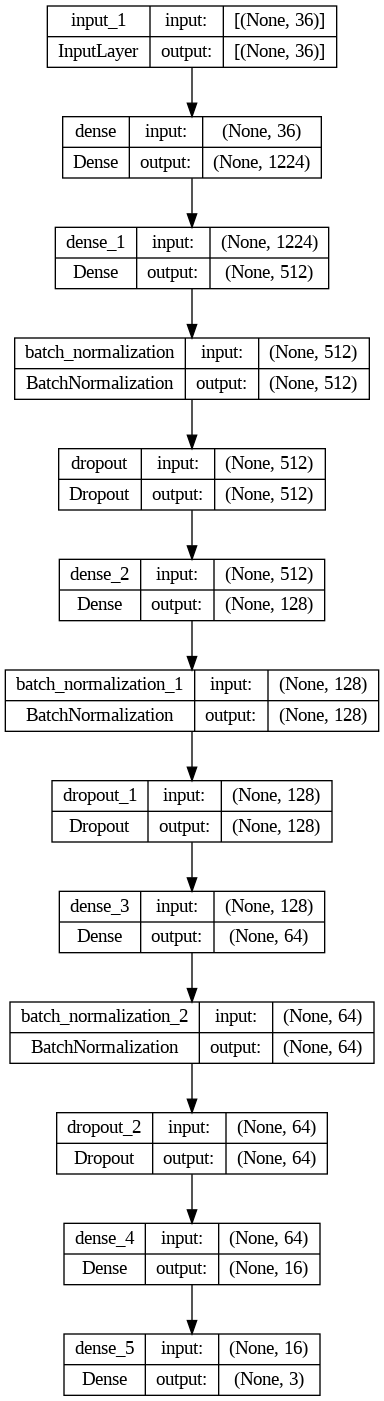

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from tensorflow import keras

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import CSVLogger
import time

csv_logger = CSVLogger('training.log', separator=',', append=False)

start_train = time.time()

history = model.fit(train_features, train_labels,
                    epochs=500, batch_size=60,
                    validation_data=(val_features, val_labels),
                    callbacks=[csv_logger])

end_train = time.time()

start_test = time.time()

test_loss, test_accuracy = model.evaluate(test_features, test_labels)

end_test = time.time()

print("Lama waktu training = ", end_train - start_train, "detik")
print("Lama waktu testing = ", end_test - start_test, "detik")

Epoch 1/500
39/39 [==============================] - 5s 49ms/step - loss: 0.8784 - accuracy: 0.6265 - val_loss: 0.7516 - val_accuracy: 0.7992
Epoch 2/500
39/39 [==============================] - 1s 34ms/step - loss: 0.6331 - accuracy: 0.7382 - val_loss: 0.6359 - val_accuracy: 0.7677
Epoch 3/500
39/39 [==============================] - 1s 38ms/step - loss: 0.5233 - accuracy: 0.7863 - val_loss: 0.5370 - val_accuracy: 0.7913
Epoch 4/500
39/39 [==============================] - 2s 51ms/step - loss: 0.5045 - accuracy: 0.7890 - val_loss: 0.4425 - val_accuracy: 0.8228
Epoch 5/500
39/39 [==============================] - 2s 49ms/step - loss: 0.4511 - accuracy: 0.8095 - val_loss: 0.3861 - val_accuracy: 0.8465
Epoch 6/500
39/39 [==============================] - 2s 50ms/step - loss: 0.4297 - accuracy: 0.8117 - val_loss: 0.3690 - val_accuracy: 0.8425
Epoch 7/500
39/39 [==============================] - 2s 41ms/step - loss: 0.3915 - accuracy: 0.8345 - val_loss: 0.3528 - val_accuracy: 0.8425
Epoch 

Note:

over fitting terjadi apabila model bagus di data training, tapi tidak bagus buat data lain. terjadi karena data banyak yang mirip, variasi kurang, epoch terlalu banyak, data imbalance, data terlalu sedikit

callback = untuk menghindari over fitting

earlystopping = memberhentikan training disaat val_loss (ada kenaikan/tidak ada perubahan)

callback custom = biasanya sudah ditentukan val_accuracy-nya berapa (misal 0.999)

In [ ]:
model.evaluate(test_features, test_labels)

35/35 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9936


[0.02177264913916588, 0.9935720562934875]

In [ ]:
model.save('/content/drive/MyDrive/model_Class_Gurami.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


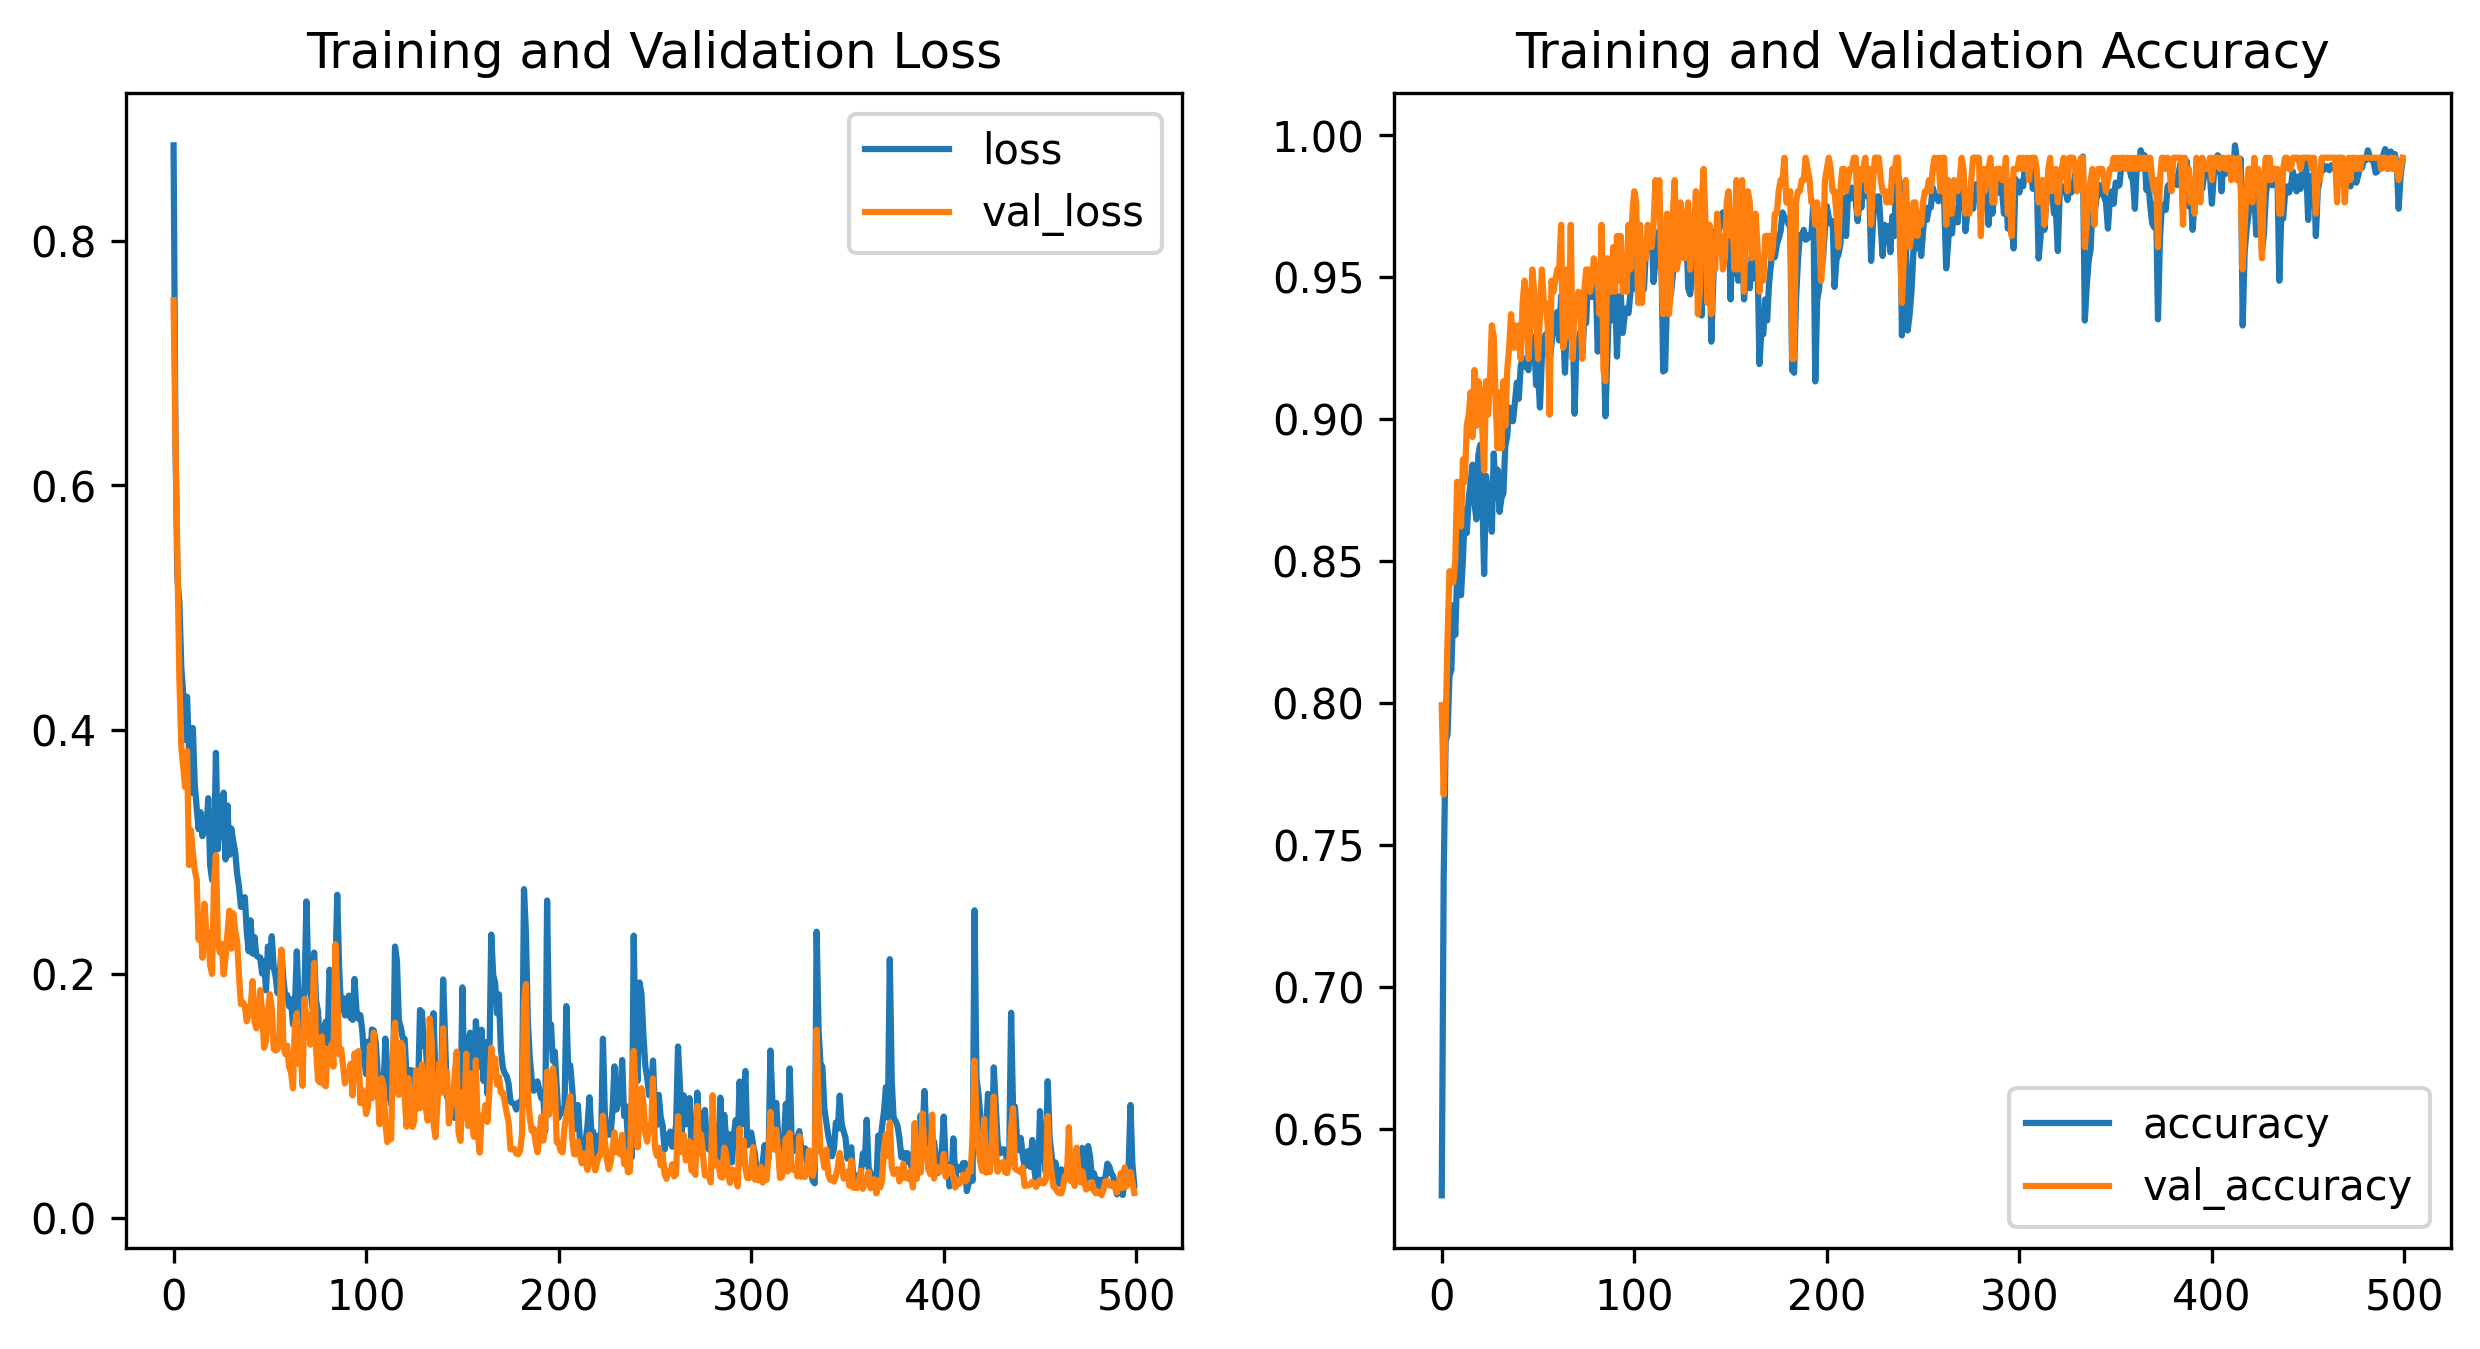

In [ ]:
metrics = history.history
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Training and Validation Loss')
plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/model_Class_Gurami.h5')

In [ ]:
# Performance evaluation
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(test_features), axis=1)
y_true = test_labels

print(classification_report(y_true, y_pred))

35/35 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       360
           1       0.97      0.99      0.98       150
           2       1.00      1.00      1.00       579

    accuracy                           0.99      1089
   macro avg       0.99      0.99      0.99      1089
weighted avg       0.99      0.99      0.99      1089



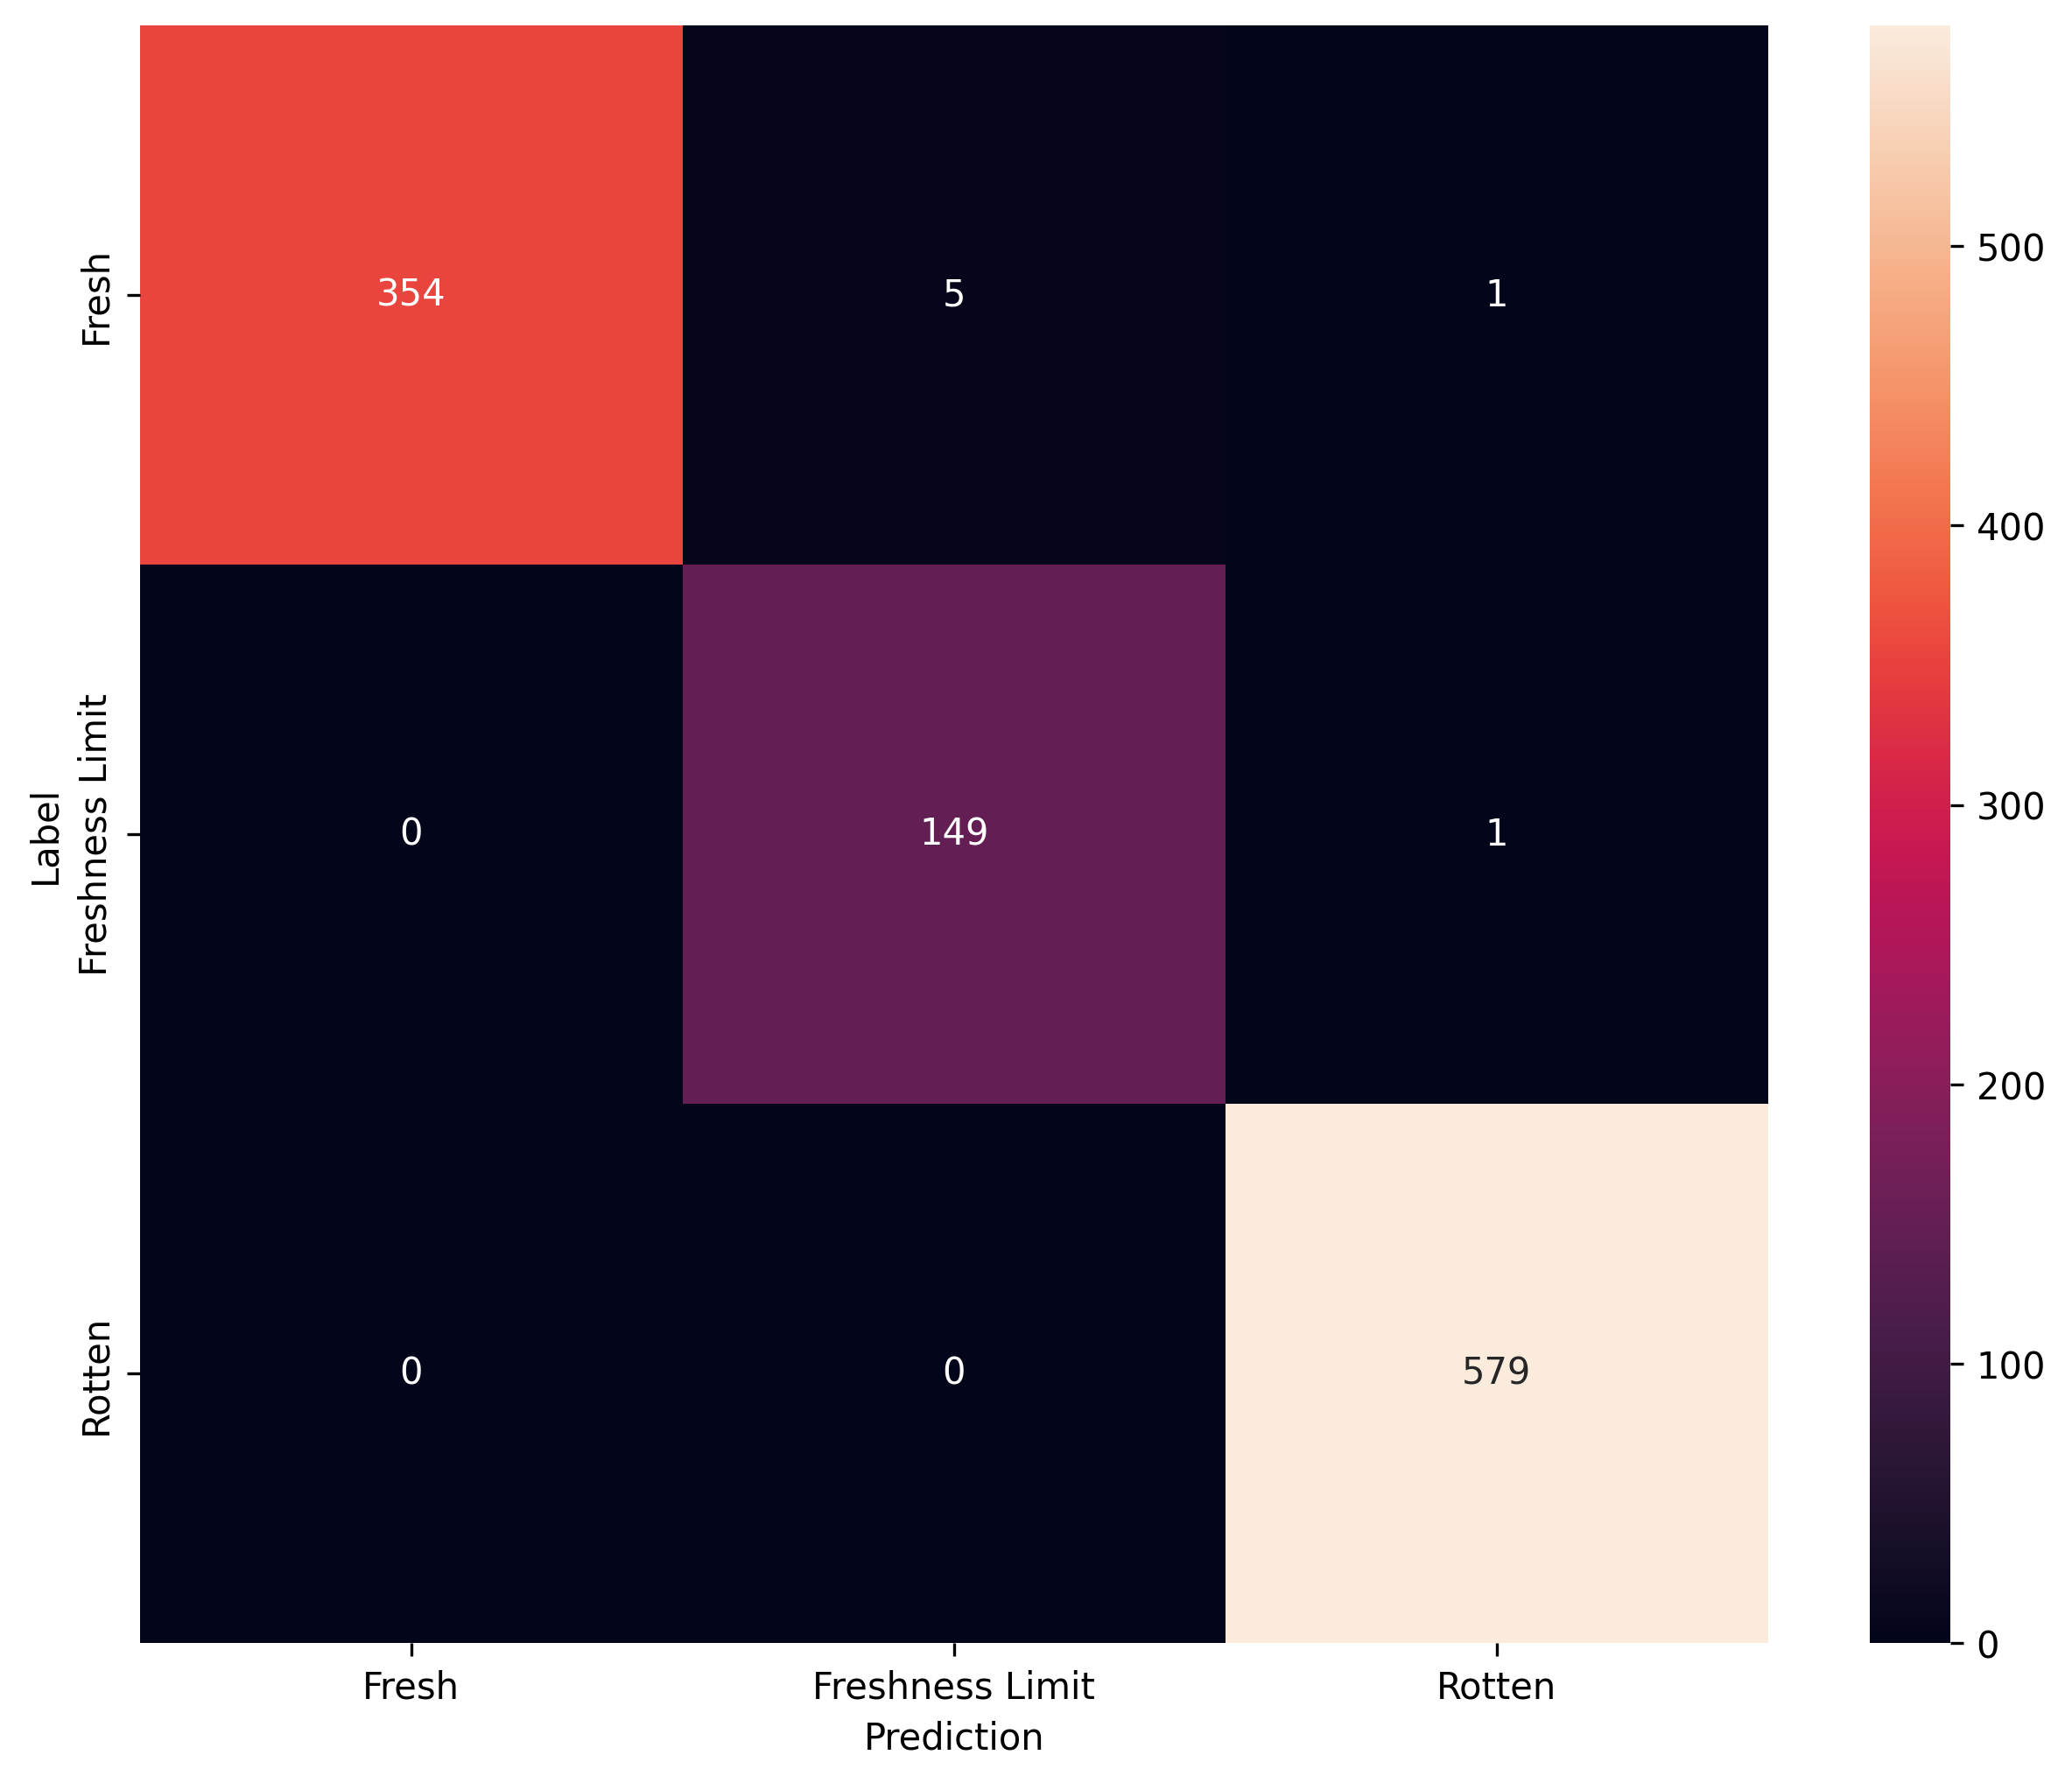

In [ ]:
# Confusion matrix DNN
class_names = le.classes_
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=class_names,
            yticklabels=class_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
test_predictions_baseline = model.predict(test_features, batch_size=60)
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=60, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

19/19 [==============================] - 0s 6ms/step
loss :  0.02177264913916588
accuracy :  0.9935720562934875

